# Overall Major Activity Frequency

In [1030]:
from wordcloud import WordCloud # ใช้ทำ Word Cloud
import pandas as pd # ใช้โหลดข้อมูลและสร้างข้อมูล
import matplotlib.pyplot as plt # ใช้ Visualize Word Cloud
import ast
import dask.dataframe as dd
import dask
dask.config.set({"dataframe.convert-string": False})
from pythainlp.tokenize import word_tokenize # เป็นตัวตัดคำของภาษาไทย
from pythainlp.corpus import thai_stopwords # เป็นคลัง Stop Words ของภาษาไทย 
from numpy import unique
from tqdm.notebook import tqdm
import matplotlib
import numpy as np
if 'Sarabun' not in [x.name for x in matplotlib.font_manager.fontManager.ttflist]:
    matplotlib.font_manager.fontManager.addfont('Sarabun-Regular.ttf')

matplotlib.rc('font', family='Sarabun')

In [1031]:
year = 2023
df = pd.read_csv(str(year)+'.csv') # โหลดข้อมูลไฟล์ Excel ของเรา
df = df[(df['activity_comb'] != '[()]') & (df['activity_comb'] != '[]')].reset_index(drop=True)
len(df['labels'].unique())

15

In [1032]:
def generate_groups(lists):
    for group in product(*lists):
        yield group

#Define a function to be applied to each partition
def primary_type_comb_process_partition(partition):
    partition = partition.reset_index(drop = True)
    # Extract mentioned activities along the places from text post by LLM
    for index, primaryType_itinerary_text in tqdm(enumerate(partition['rename_activity_comb'])):
        try:
            primaryType_itinerary_lists = ast.literal_eval(primaryType_itinerary_text)
            partition.loc[index, 'rename_activity_comb'] = primaryType_itinerary_lists
            partition.loc[index, 'activity_comb'] = ast.literal_eval(partition.loc[index, 'activity_comb'])
        except Exception as e:
            print(e)
    return partition

df = df.astype('object')
# Read the large DataFrame using Dask
_df = dd.from_pandas(df, npartitions=10)

# Apply the function to each partition in parallel
result_df = _df.map_partitions(primary_type_comb_process_partition).compute()
df = result_df.copy()
df = df.reset_index(drop=True)
df

0it [00:00, ?it/s]

malformed node or string on line 1: <ast.Name object at 0x000002550271FEB0>
malformed node or string on line 1: <ast.Name object at 0x000002550271D480>


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

urls       keyword  \
0    https://www.facebook.com/groups/paikondieow/pe...           ฤดู   
1    https://www.facebook.com/groups/paikondieow/pe...  unidentified   
2    https://www.facebook.com/groups/paikondieow/pe...  unidentified   
3    https://www.facebook.com/groups/paikondieow/pe...         สิงหา   
4    https://www.facebook.com/groups/paikondieow/pe...         สิงหา   
..                                                 ...           ...   
273  https://www.facebook.com/share/p/ahKPxsMNEgzrg...          trip   
274  https://www.facebook.com/groups/paikondieow/pe...            กพ   
275  https://www.facebook.com/groups/paikondieow/pe...            กพ   
276  https://www.facebook.com/groups/paikondieow/pe...         สิงหา   
277  https://www.facebook.com/groups/paikondieow/pe...            ฝน   

                                                  text  \
0    ท่ามกลางท้องฟ้าอันสดใสและผืนทะเลสีครามของต้นฤด...   
1    Gamping คูล ๆ นอนรถบ้านริมทะเลที่เดียวในสัตหีบ...   
2    Gamping คูล ๆ นอนรถบ้านริมทะเลที่เดียวในสัตหีบ...   
3    12 พิกัด มาเก๊า-จูไห่ บินเที่ยวสบายๆ ไม่ต้องทำ...   
4    12 พิกัด มาเก๊า-จูไห่ บินเที่ยวสบายๆ ไม่ต้องทำ...   
..                                                 ...   
273  งามแต้..เมืองแป้หน้าฝนจ้าววว ยิ่งรู้จักยิ่งหลง...   
274  เที่ยวปีใหม่ที่เชียงรายค่ะหลงรักไม่ไหว อยากย้า...   
275  เที่ยวปีใหม่ที่เชียงรายค่ะหลงรักไม่ไหว อยากย้า...   
276  โรงแรมสุดชิล มาพร้อมรูฟท็อปวิวหาดพัทยาสุดปัง "...   
277  ทุ่งนา ภูเขา ลำธาร #บ่อเกลือ #น่าน ถ้าชอบบรรยา...   

                                                places  \
0    ["เกาะมัน", "เกาะมันใน", "เกาะมันกลาง", "เกาะม...   
1    ["หาด EOD สัตหีบ", "หาดน้ำใส", "หาดดงตาล", "ตล...   
2    ["หาด EOD สัตหีบ", "หาดน้ำใส", "หาดดงตาล", "ตล...   
3    ["มาเก๊า", "จูไห่", "PONTO SQUARE", "อนุสรณ์สถ...   
4    ["มาเก๊า", "จูไห่", "PONTO SQUARE", "อนุสรณ์สถ...   
..                                                 ...   
273  ["จังหวัดแพร่", "วัดพระธาตุอินทร์แขวน", "จังหว...   
274  ["เชียงราย", "โรงแรมวังคำ", "สวนดอกไม้", "หอนา...   
275  ["เชียงราย", "โรงแรมวังคำ", "สวนดอกไม้", "หอนา...   
276  ["พัทยา", "ชายหาด", "พัทยาเหนือ", "บางละมุง", ...   
277  ["บ่อเกลือ", "น่าน", "บ่อเกลือโบราณ", "บ้านผาค...   

                                           place_infos  \
0    [{'types': ['natural_feature', 'establishment'...   
1    [{'types': ['natural_feature', 'establishment'...   
2    [{'types': ['natural_feature', 'establishment'...   
3    [{'types': ['clothing_store', 'store', 'point_...   
4    [{'types': ['clothing_store', 'store', 'point_...   
..                                                 ...   
273  [{'types': ['tourist_attraction', 'place_of_wo...   
274  [{'types': ['hotel', 'lodging', 'point_of_inte...   
275  [{'types': ['hotel', 'lodging', 'point_of_inte...   
276  [{'types': ['tourist_attraction', 'point_of_in...   
277  [{'types': ['tourist_attraction', 'point_of_in...   

                                       filtered_places  \
0    ['เกาะมัน', 'เกาะมันใน', 'เกาะมันกลาง', 'เกาะม...   
1    ['หาด EOD สัตหีบ', 'หาดน้ำใส', 'หาดดงตาล', 'ตล...   
2    ['หาด EOD สัตหีบ', 'หาดน้ำใส', 'หาดดงตาล', 'ตล...   
3    ['PONTO SQUARE', 'หวี่นี่', 'ตลาดใต้ดินก๊งเป่ย...   
4    ['PONTO SQUARE', 'หวี่นี่', 'ตลาดใต้ดินก๊งเป่ย...   
..                                                 ...   
273  ['วัดพระธาตุอินทร์แขวน', 'พระธาตุอินทร์แขวน', ...   
274  ['โรงแรมวังคำ', 'หอนาฬิกา', 'ตลาดไนท์บราซ่า', ...   
275  ['โรงแรมวังคำ', 'หอนาฬิกา', 'ตลาดไนท์บราซ่า', ...   
276                      ['ชายหาด', 'M Pattaya Hotel']   
277              ['บ่อเกลือโบราณ', 'บ้านผาคับ', 'Nan']   

                                filtered_rename_places  \
0    ['Ko Man Nork', 'Ko Man Nai', 'Ko Man Klang', ...   
1    ['Nang Rong Beach', 'Nam Sai Beach', 'Dongtan ...   
2    ['Nang Rong Beach', 'Nam Sai Beach', 'Dongtan ...   
3    ['PRONTO Siam square soi 2', 'ไอ-มี่ ชาบู', 'S...   
4    ['PRONTO Siam square soi 2', 'ไอ-มี่ ชาบู', 'S...   
..                                               

In [1033]:
major_activity_df = df.explode('rename_activity_comb').explode('rename_activity_comb').drop_duplicates(['urls','text','rename_activity_comb', 'labels'], keep='first').dropna().reset_index(drop=True)[['rename_activity_comb', 'labels']]
major_activity_df = major_activity_df[major_activity_df['rename_activity_comb']!= 'ERROR']

In [1034]:
freq = major_activity_df['rename_activity_comb'].value_counts()
for pType, pCount in freq.items():
    pct = ' {0:.2f}%'.format(pCount*100 / freq.values.sum())
    major_activity_df.loc[major_activity_df['rename_activity_comb'] == pType, 'rename_activity_comb'] = pType + pct
    # freq.values / (chart_df[['primaryType', 'value']].value_counts().values).sum() * 100
major_activity_df

rename_activity_comb labels
0                        Relaxation 4.48%      6
1             Relaxation Activities 0.78%      6
2                 Nature Activities 3.12%      6
3                Spa and relaxation 2.92%      5
4    Nature and Outdoor Activities 14.81%      5
..                                    ...    ...
508                 Food and Dining 8.38%      5
509                Seafood Shopping 1.95%      5
510  Nature and Outdoor Activities 14.81%      5
511                  Seaside Dining 0.39%      5
512                         Camping 9.55%      0

[513 rows x 2 columns]

In [1035]:
major_activity_df['value'] = 1

In [1036]:
# {
#                      'Agriculture':'red',
#                          'Art and Culture': 'green',
#                          'Conference and Community': 'blue',
#                          'Education': 'yellow',
#                          'Entertainment': 'cyan',
#                          'Food and Drink': 'purple',
#                          'Healthcare and Wellness': 'teal',
#                          'Hotel': 'magenta',
#                          'Religion': 'orange',
#                          'Service': 'lime',
#                          'Shop and Store':'pink',
#                          'Sport': 'olive',
#                          'Tourism': 'navy'
#                      },

In [1037]:
# color_discrete_map = {
# 'NONE',
#  'Food and Dining',
#  'Religious Activities',
#  'Nature and Outdoor Activities',
#   'Relaxation',
#  'Camping',
#  'Shopping',
# 'Camping',
#   'Vehicle Rental',
# 'Nature Activities',
#  'Photography',
#  'Beach Activities',
#  'Water Activities',
#  'Beverage Consumption',
#   'Relaxation',
#  'Coffee Activities',
#   'Nature and Garden Activities',
# 'Wildlife and Nature Exploration',
#  'Food Market',
#   'Mountain Activities',
#   'Art Exhibitions',
#  'Waterfall Activities',
#  'Seaside Dining',
#  'Cycling',
#  'Music Festival',
#  'Water Activities',
#  'Cultural and Agricultural Learning',
#  'Travel',
#  'Animal Encounters',
#   'Cave Exploration',
#   'Cooking and Animal Care',
#  'Puppetry',
#   'Online Train Ticket Booking',
#  'Relaxation Activities',
# 'Moomin Activities',
#  'Winter Activities',
#  'Walking and Shopping',
#   'Elephant Watching',
#   'Spa and relaxation',
#   'Golf',
#  'Self-care',
# 'Seafood Shopping',
#  'Relaxation',
# 'Rooftop bar',
#  'Chinese New Year'}
# # {
# #     'Food and Beverage': '#FF5733',  # Red-orange
# #     'Religious Activities': '#33FF57',  # Green
# #     'Camping': '#3357FF',  # Blue
# #     'Music Festival': '#FF33A8',  # Pink
# #     'Transportation': '#FF8C33',  # Orange
# #     'Shopping': '#33FF8C',  # Light Green
# #     'Photography': '#5733FF',  # Purple
# #     'Water Activities': '#33D1FF',  # Light Blue
# #     'Flower and Nature Appreciation': '#FF5733',  # Red-orange
# #     'Coffee Activities': '#8C33FF',  # Violet
# #     'Breakfast': '#33FFA8',  # Mint Green
# #     'Rock Climbing': '#FF3333',  # Red
# #     'Agricultural Activities': '#D1FF33',  # Yellow-green
# #     'Cycling': '#33FF57',  # Green
# #     'Relaxation': '#33A8FF',  # Sky Blue
# #     'Puppetry': '#FF5733',  # Red-orange
# #     'Walking': '#FF5733',  # Red-orange
# #     'Online Train Ticket Booking': '#A8FF33',  # Lime Green
# #     'Moomin Activities': '#3357FF',  # Blue
# #     'Toy Exhibition': '#FF33D1',  # Magenta
# #     'Water Activities': '#33D1FF',  # Light Blue
# #     'Elephant Watching': '#FF5733',  # Red-orange
# #     'Scuba Diving': '#33FFA8',  # Mint Green
# #     'Spa and relaxation': '#33A8FF'  # Sky Blue
# # }


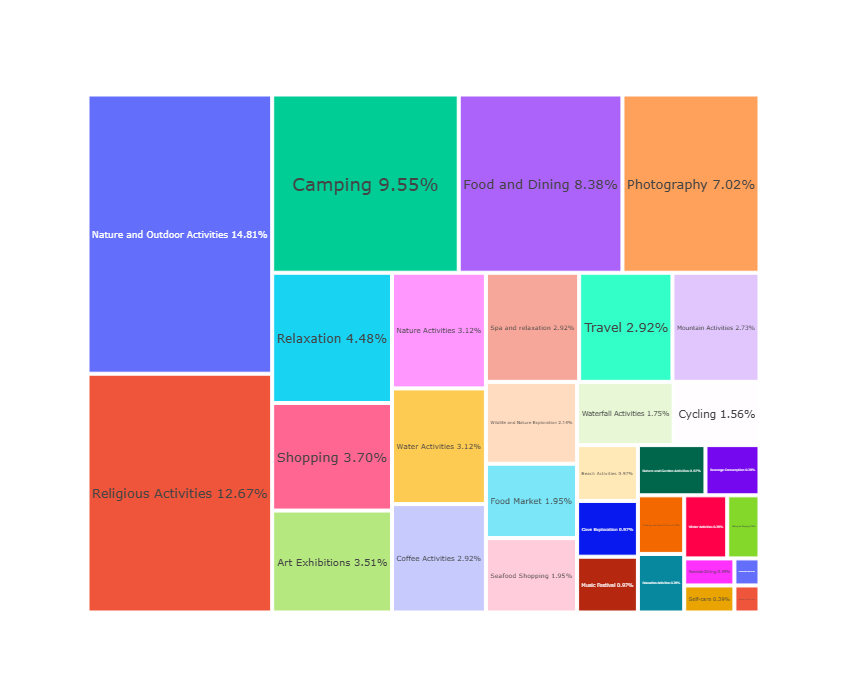

In [1038]:
import plotly.express as px
import numpy as np
# 2019
# df = px.data.gapminder().query("year == 2007")
fig = px.treemap(major_activity_df, color_discrete_map = color_discrete_map,path=['rename_activity_comb'],width=1200, height=700 )
fig.update_traces(textposition='middle center', textfont_size=18,
                 # marker=dict(line=dict(color='#000000', width=2))
                   
                 )

fig.write_image('./dataset/'+str(year)+"/activity_clustering/overall_activity_distribution.png")
fig.show()

In [1039]:
# import plotly.express as px
# import numpy as np
# # 2023
# # df = px.data.gapminder().query("year == 2007")
# fig = px.treemap(major_activity_df, path=['rename_activity_comb'],width=1000, height=700, color_discrete_map = color_discrete_map)
# fig.write_image('./dataset/'+str(year)+"/activity_clustering/overall_activity_distribution.png")
# fig.show()

# Word Cloud for Minor Activity Analysis

In [1040]:
from wordcloud import WordCloud # ใช้ทำ Word Cloud
import pandas as pd # ใช้โหลดข้อมูลและสร้างข้อมูล
import matplotlib.pyplot as plt # ใช้ Visualize Word Cloud
from pythainlp.tokenize import word_tokenize # เป็นตัวตัดคำของภาษาไทย
from pythainlp.corpus import thai_stopwords # เป็นคลัง Stop Words ของภาษาไทย 
from numpy import unique
from tqdm.notebook import tqdm
import matplotlib

if 'Sarabun' not in [x.name for x in matplotlib.font_manager.fontManager.ttflist]:
    matplotlib.font_manager.fontManager.addfont('Sarabun-Regular.ttf')

matplotlib.rc('font', family='Sarabun')

In [1041]:
from itertools import chain
embeddings_activity_df = pd.read_csv('./dataset/db_all/activity/' + 'activity_labels.csv')
_df = dd.read_parquet('dataset/'+str(year)+'/dataset.parquet', engine='pyarrow')
df = _df.compute().reset_index(drop=True)
df = df[(df['activity_comb'] != '[()]') & (df['activity_comb'] != '[]')].reset_index(drop=True)
activity_list = list(chain.from_iterable(list(chain.from_iterable(df['activity_comb'].apply(lambda x: ast.literal_eval(x)).to_list()))))
rename_activity_list = list(chain.from_iterable(list(chain.from_iterable(df['rename_activity_comb'].apply(lambda x: ast.literal_eval(x)).to_list()))))
df = pd.DataFrame({'activity_name': activity_list, 'labels_desc':rename_activity_list })
df
# df['rename_activity_comb'].apply(lambda x: ast.literal_eval(x))
# df['activity_comb'].to_list()
# df[['activity_comb', 'rename_activity_comb']]
# year = 2021
# df = pd.read_csv('./dataset/'+str(year)+'/activity_clustering/activity_labels.csv') # โหลดข้อมูลไฟล์ Excel ของเรา
# df
# year = 2021
# df = pd.read_csv(str(year)+'.csv') # โหลดข้อมูลไฟล์ Excel ของเรา
# df = df[(df['activity_comb'] != '[()]') & (df['activity_comb'] != '[]')].reset_index(drop=True)
# df

activity_name  \
0                             พักผ่อนกับที่พักสุดไพรเวท   
1                                    กิจกรรมชวนผ่อนคลาย   
2               ฮีลร่างกายและจิตใจด้วยธรรมชาติอันสวยงาม   
3                           แช่อ่างจากุชชี่ใต้แสงจันทร์   
4                                            แล่นเรือใบ   
...                                                 ...   
2136               จิบเครื่องดื่มเย็นๆ ฟังเพลง ดูทะเลไป   
2137  อาหารทะเลสด​ ๆ​ หอยแมลงภู่นิวซีแลนด์​ ปลาหมึก​...   
2138               จิบเครื่องดื่มเย็นๆ ฟังเพลง ดูทะเลไป   
2139                 เมนูอาหารต่างๆ หม่าล่า ซูชิ พิซซ่า   
2140                                          เพ้นท์หิน   

                        labels_desc  
0                        Relaxation  
1             Relaxation Activities  
2                 Nature Activities  
3                Spa and relaxation  
4     Nature and Outdoor Activities  
...                             ...  
2136                 Seaside Dining  
2137               Seafood Shopping  
2138                 Seaside Dining  
2139                Food and Dining  
2140                        Camping  

[2141 rows x 2 columns]

In [1044]:
# df[df['labels_desc'] == 'Dining']

0it [00:00, ?it/s]

illuminate the sculpture museum 1985°f illuminate the sculpture museum 1985°f illuminate the sculpture museum 1985°f illuminate the sculpture museum 1985°f illuminate the sculpture museum 1985°f illuminate the sculpture museum 1985°f illuminate the sculpture museum 1985°f illuminate the sculpture museum 1985°f ชมงานศิลปะ visit the 'take your time' art exhibition visit the 'take your time' art exhibition นิทรรศการศิลปะ ชมนิทรรศการศิลปะ ชมนิทรรศการศิลปะเกาหลีในโลกเสมือนจริง ชมนิทรรศการศิลปะดิจิทัลอิมเมอร์ซีฟระดับโลก ชมนิทรรศการเครื่องทองสมัยอยุธยา 
['illuminate', ' ', 'the', ' ', 'sculpture', ' ', 'museum', ' ', '1985', '°f', ' ', 'illuminate', ' ', 'the', ' ', 'sculpture', ' ', 'museum', ' ', '1985', '°f', ' ', 'illuminate', ' ', 'the', ' ', 'sculpture', ' ', 'museum', ' ', '1985', '°f', ' ', 'illuminate', ' ', 'the', ' ', 'sculpture', ' ', 'museum', ' ', '1985', '°f', ' ', 'illuminate', ' ', 'the', ' ', 'sculpture', ' ', 'museum', ' ', '1985', '°f', ' ', 'illuminate', ' ', 'the', ' ', 

C:\Users\researcher01\AppData\Local\Temp\3\ipykernel_16932\3036809157.py:32: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



ชาร์จแบต ชาร์จแบตตัวเอง 
['ชาร์จ', 'แบต', ' ', 'ชาร์จ', 'แบต', 'ตัวเอง', ' ']
ช้อปเพลิน shopping fashion เลือกช้อปในวันหยุดปีใหม่ ช้อปปิ้งของมือสอง ซื้อของที่ระลึก ช้อปสนุกรับซัมเมอร์ ช้อปสนุกรับซัมเมอร์ ช้อปปิ้ง ช้อปปิ้ง ช้อปปิ้ง ช้อปปิ้ง ช้อปปิ้ง ช้อปปิ้ง 
['ช้อป', 'เพลิน', ' ', 'shopping', ' ', 'fashion', ' ', 'เลือก', 'ช้อป', 'ใน', 'วันหยุด', 'ปีใหม่', ' ', 'ช้อปปิ้ง', 'ของ', 'มือสอง', ' ', 'ซื้อ', 'ของที่ระลึก', ' ', 'ช้อป', 'สนุก', 'รับ', 'ซัมเมอร์', ' ', 'ช้อป', 'สนุก', 'รับ', 'ซัมเมอร์', ' ', 'ช้อปปิ้ง', ' ', 'ช้อปปิ้ง', ' ', 'ช้อปปิ้ง', ' ', 'ช้อปปิ้ง', ' ', 'ช้อปปิ้ง', ' ', 'ช้อปปิ้ง', ' ']
แช่อ่างจากุชชี่ใต้แสงจันทร์ แช่อ่างจากุชชี่ใต้แสงจันทร์ นวด skincare นอนอาบแดด นอนอาบแดด นอนอาบแดด นอนอาบแดด นอนอาบแดด นอนอาบแดด นอนอาบแดด นอนอาบแดด นอนอาบแดด นอนอาบแดด แช่อ่างจากุชชี่ชมหมอก แช่เท้า แช่อ่าง 
['แช่', 'อ่าง', 'จา', 'กุ', 'ช', 'ชี่', 'ใต้', 'แสงจันทร์', ' ', 'แช่', 'อ่าง', 'จา', 'กุ', 'ช', 'ชี่', 'ใต้', 'แสงจันทร์', ' ', 'นวด', ' ', 'skincare', ' ', 'นอน', 'อาบแดด', ' ', 'นอน

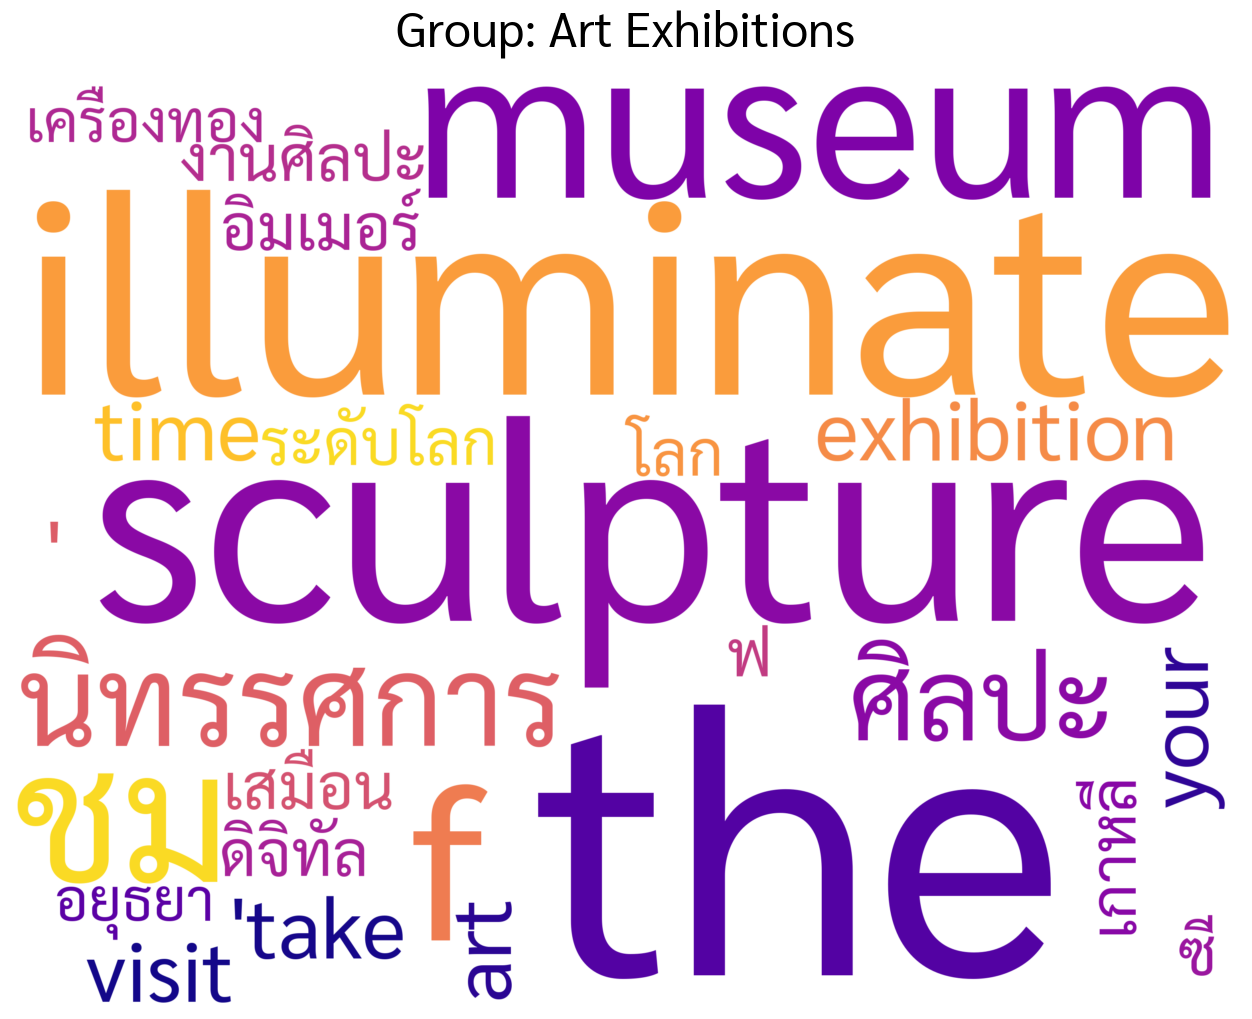

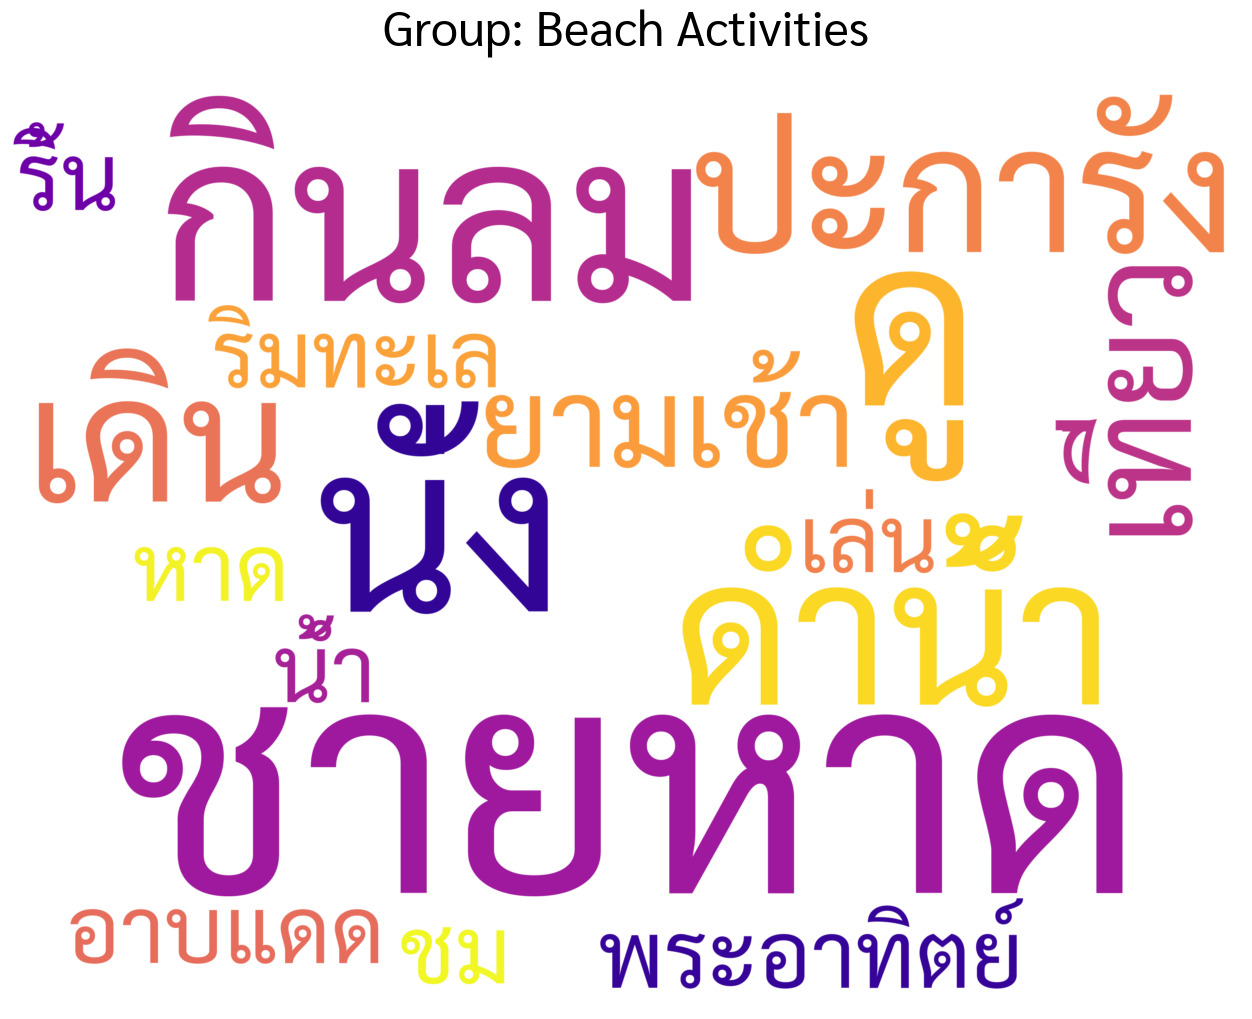

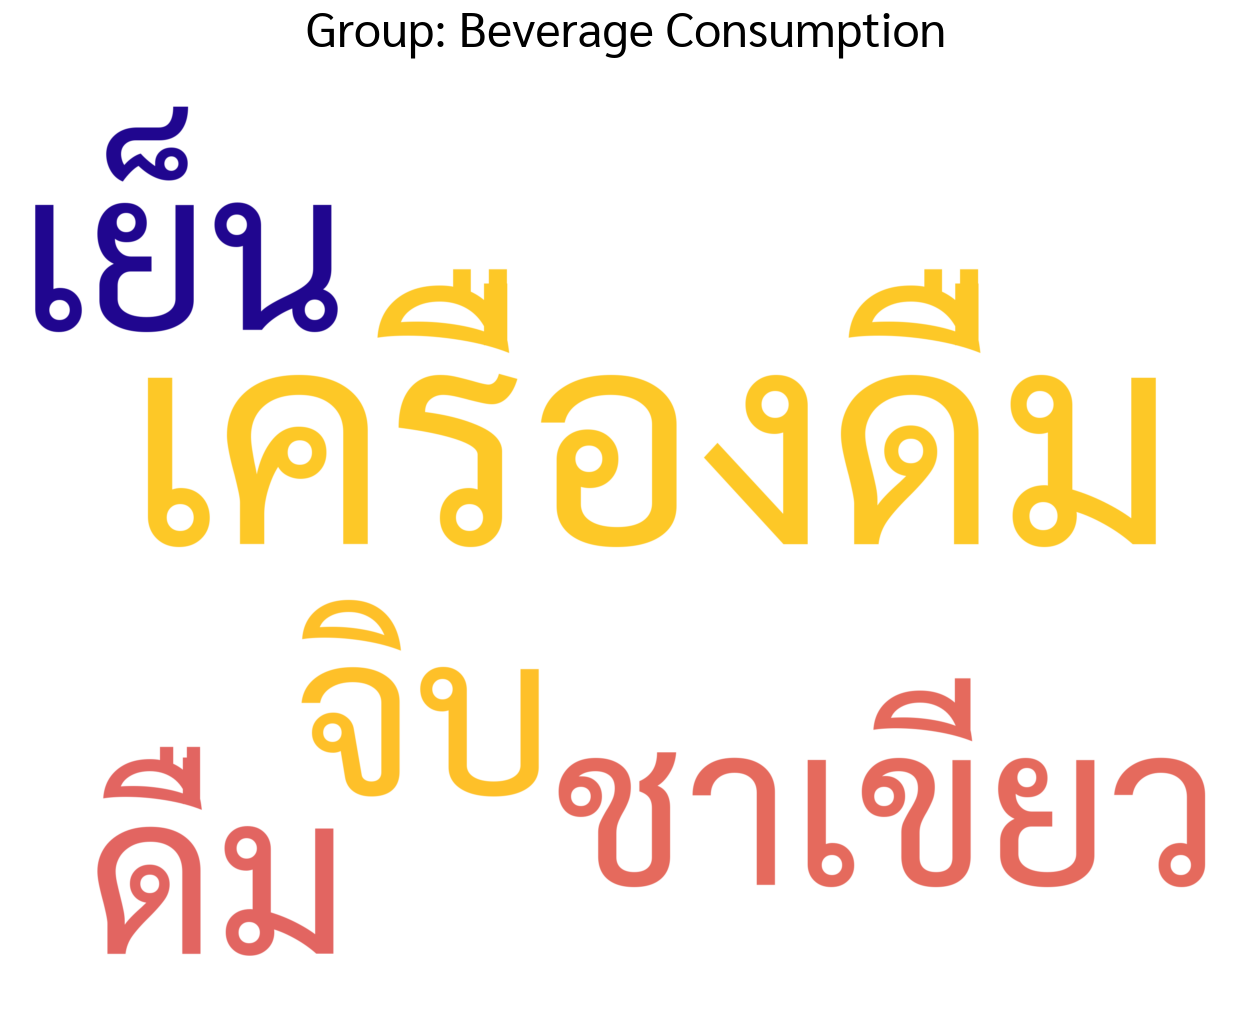

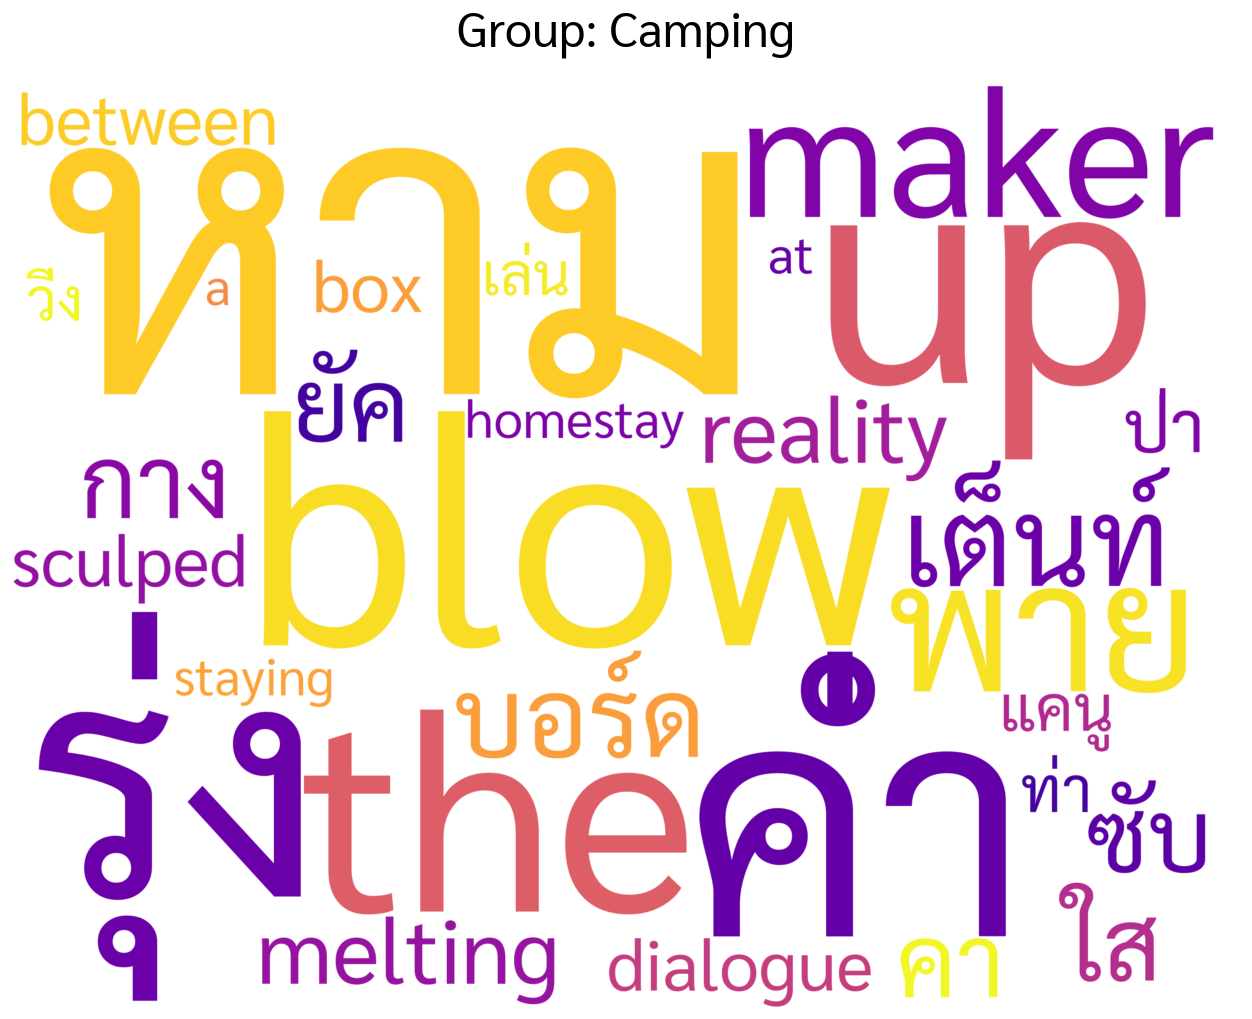

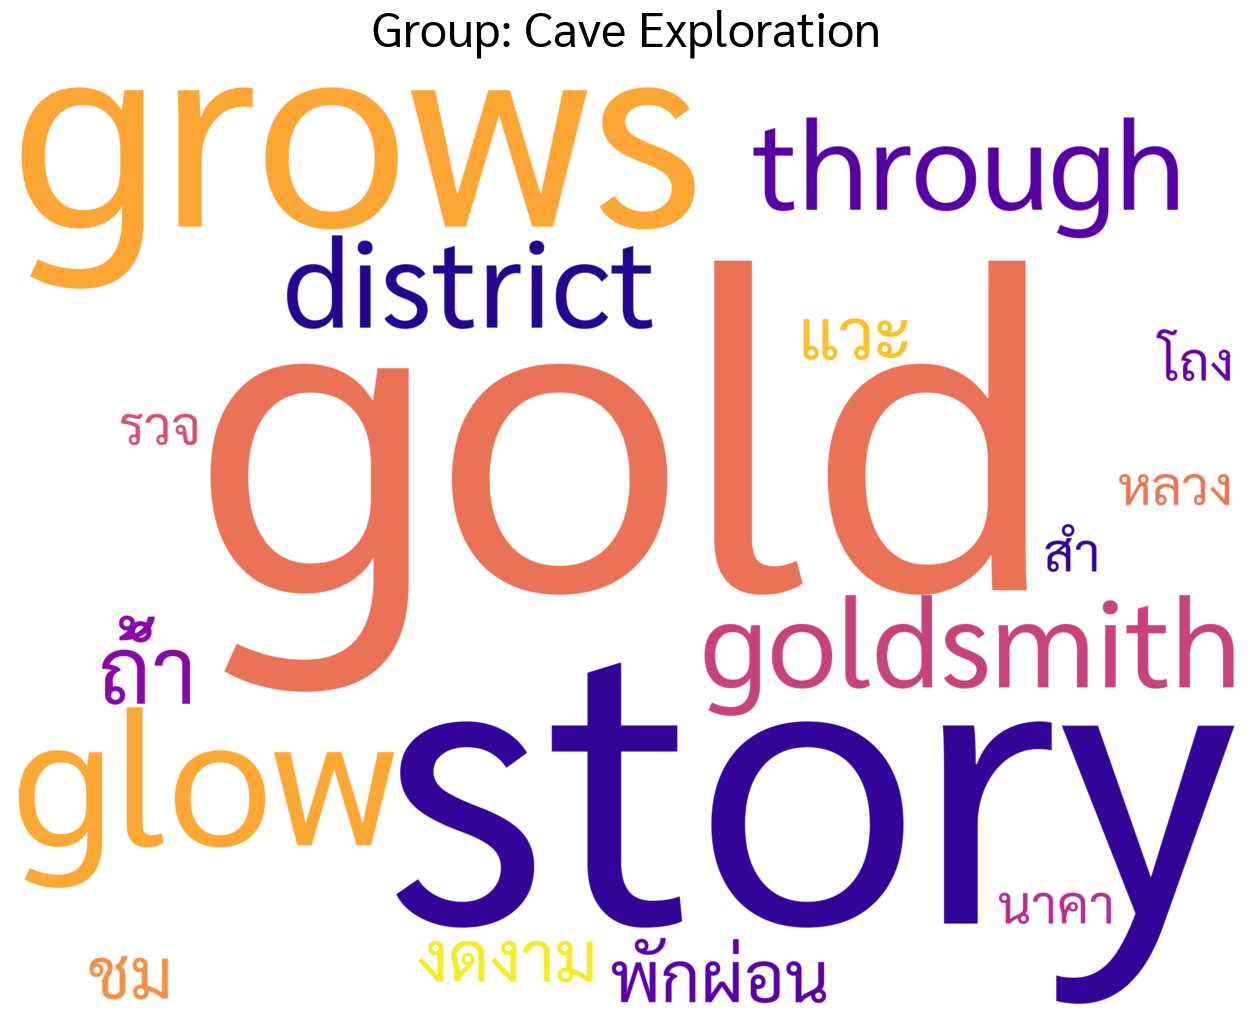

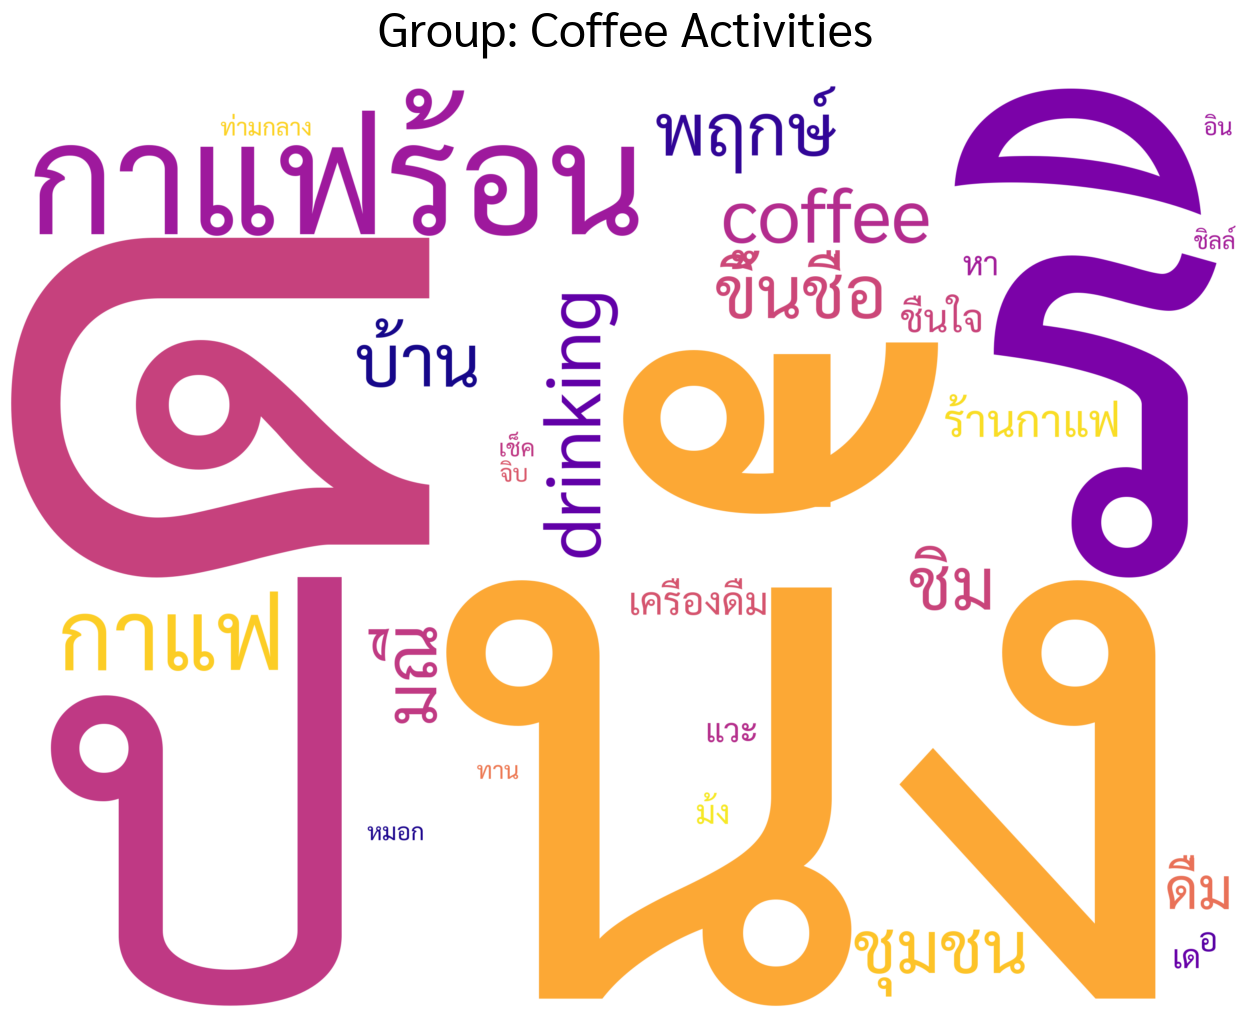

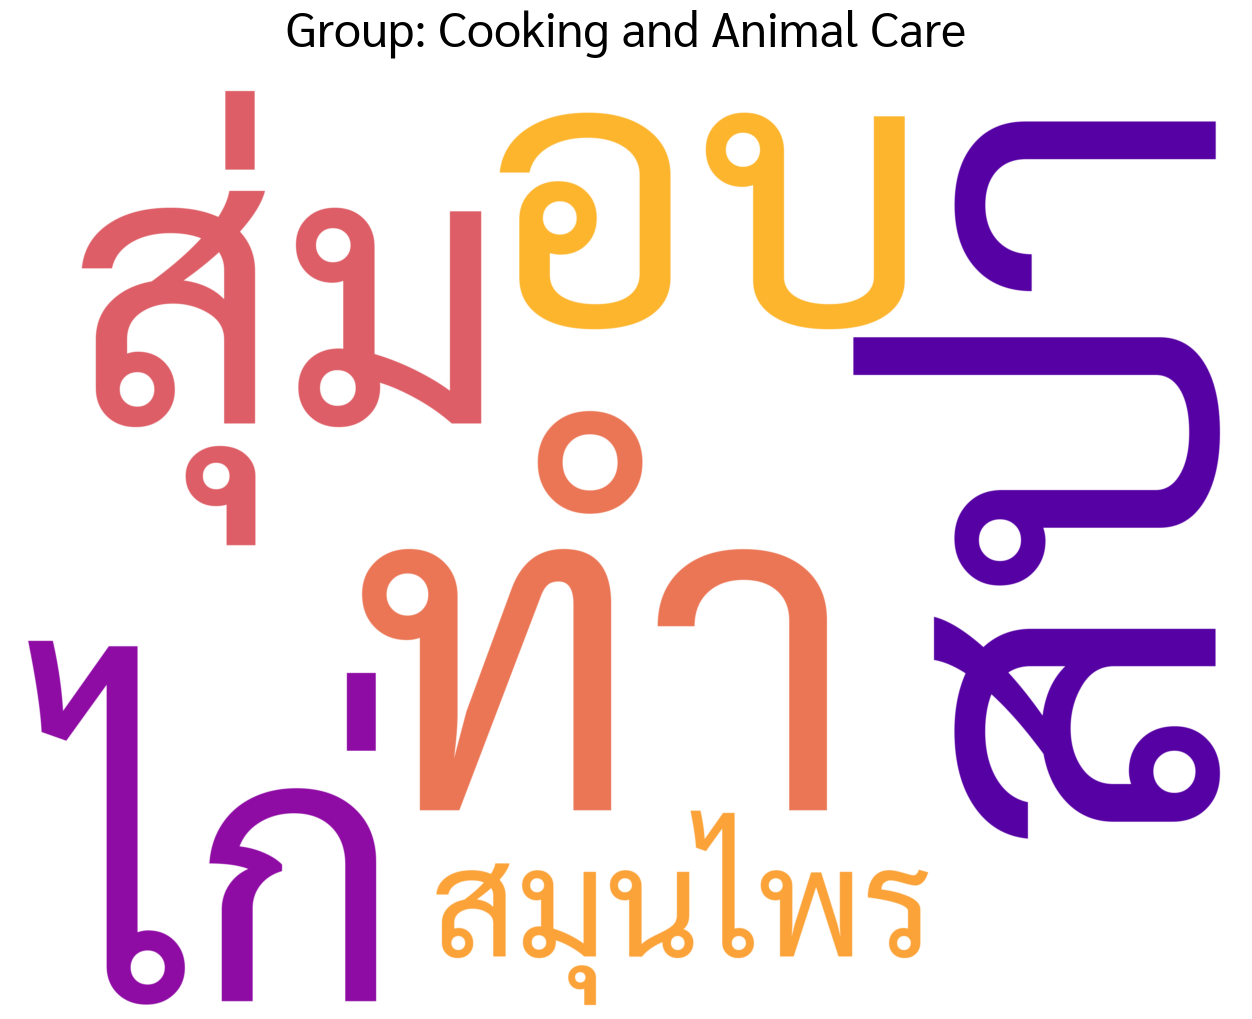

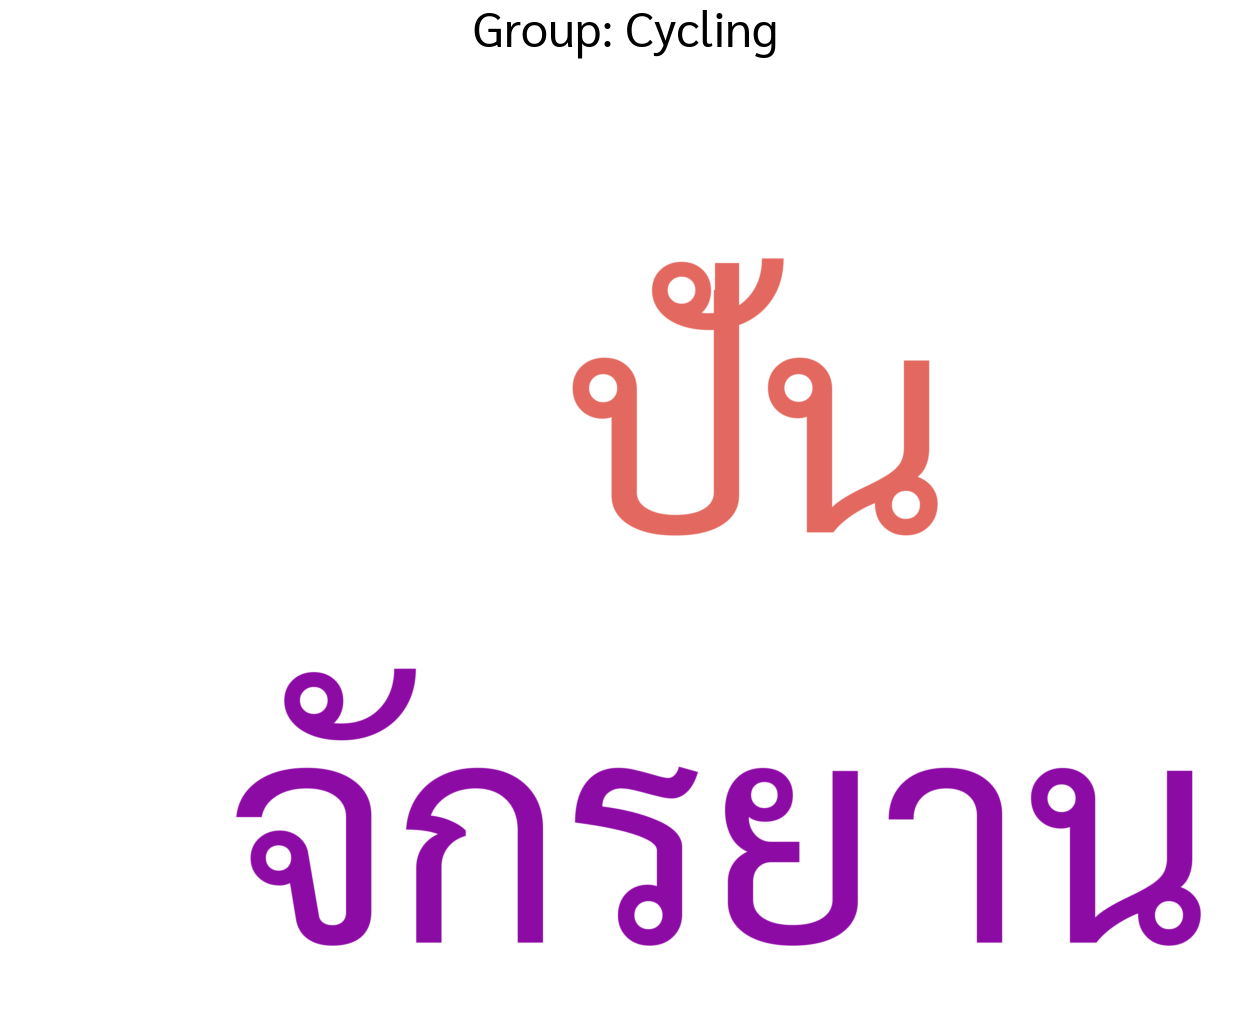

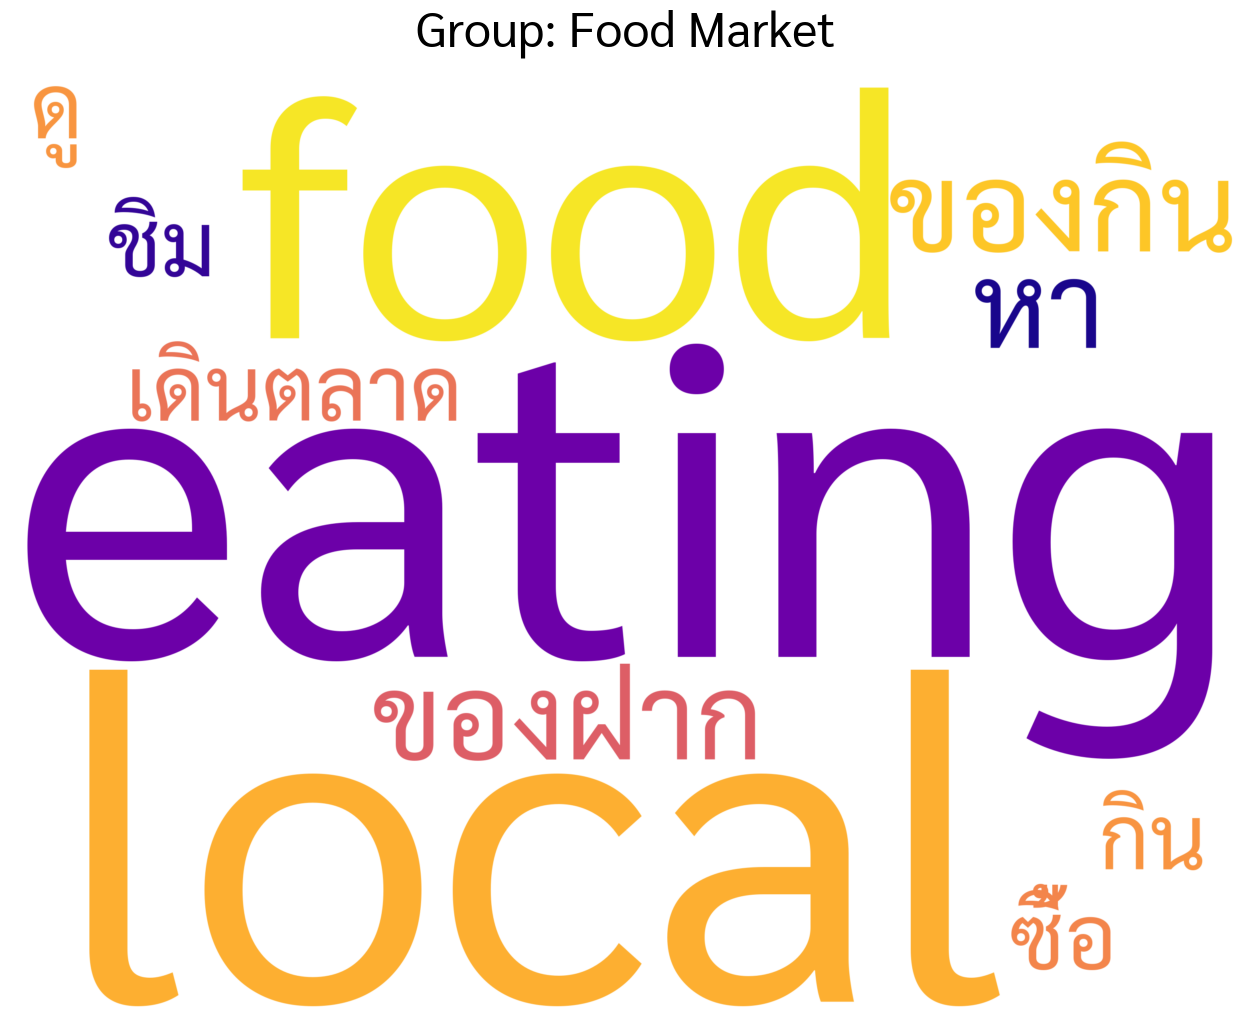

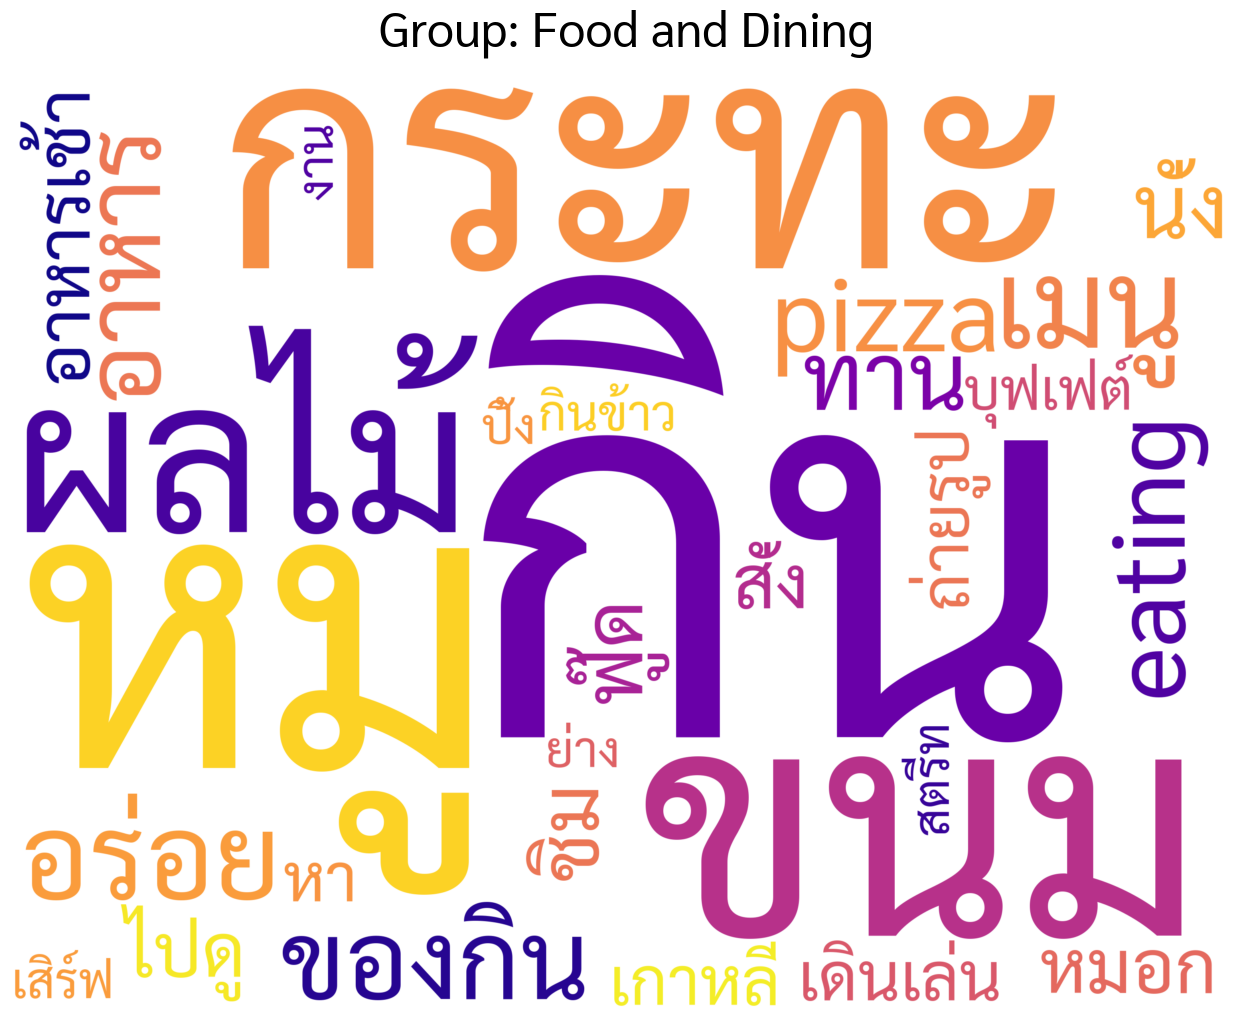

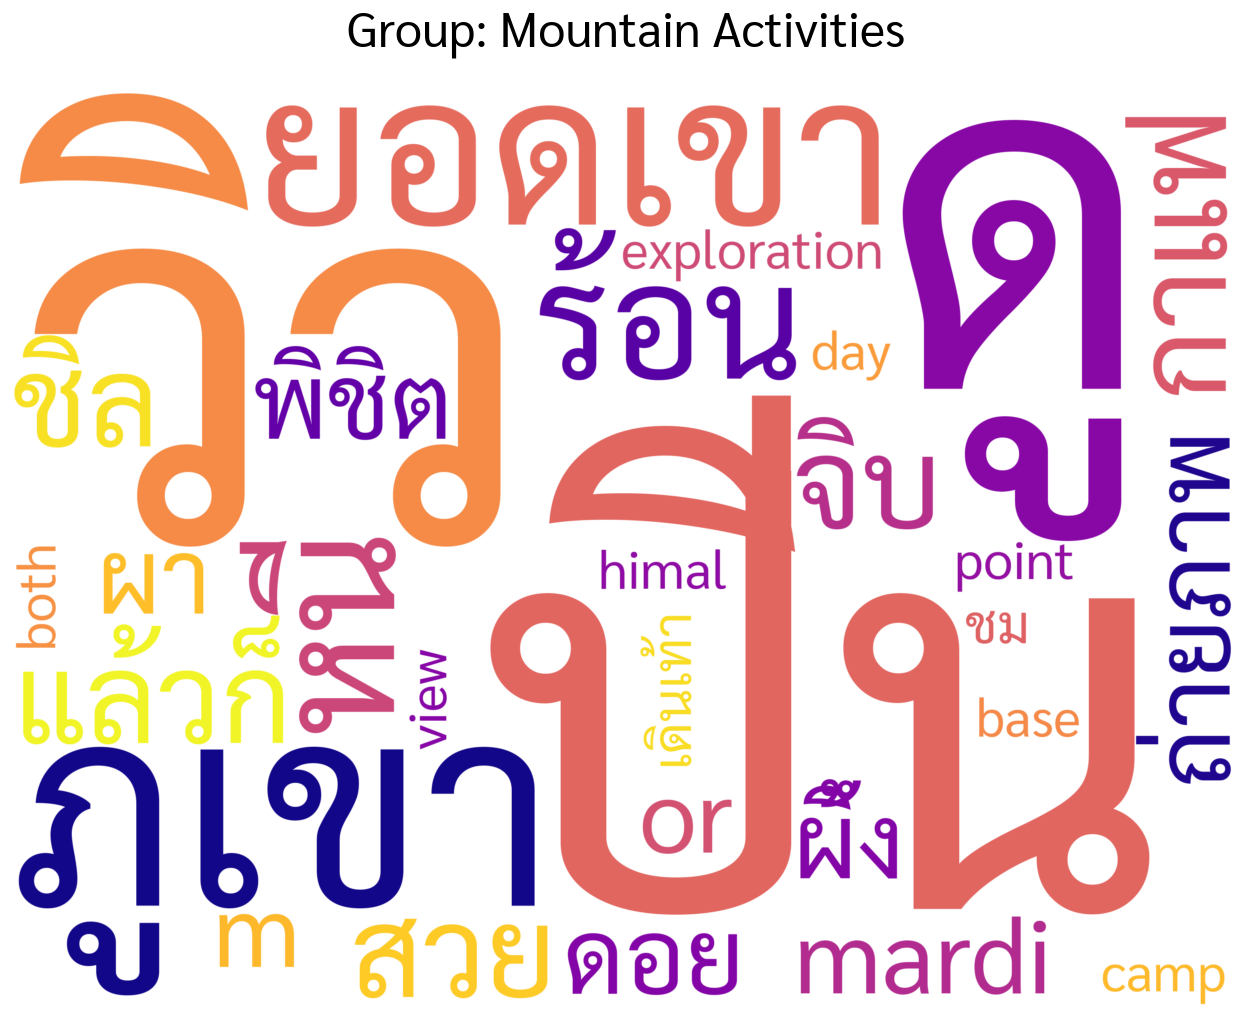

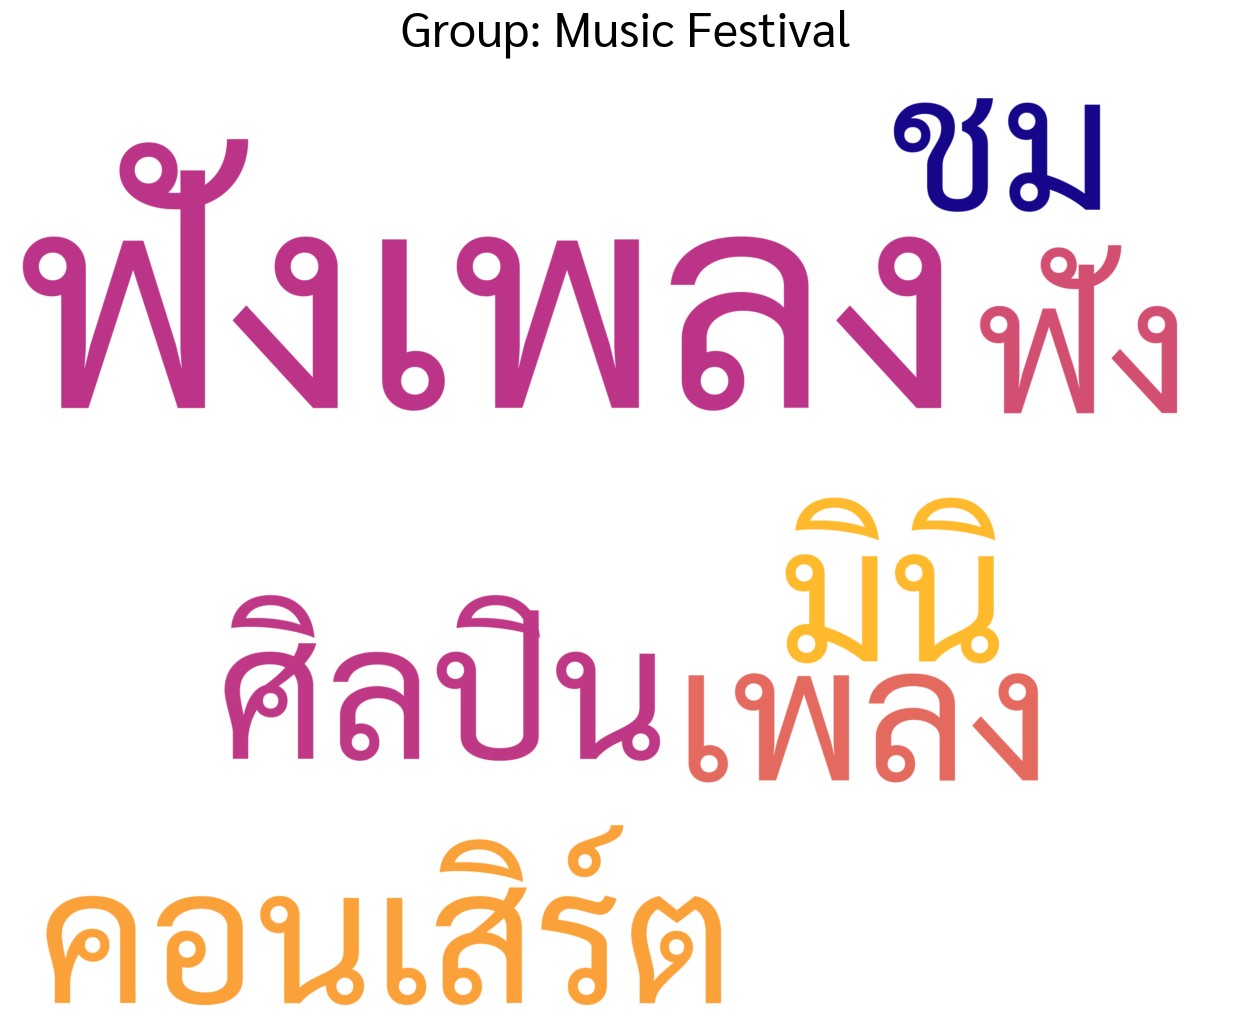

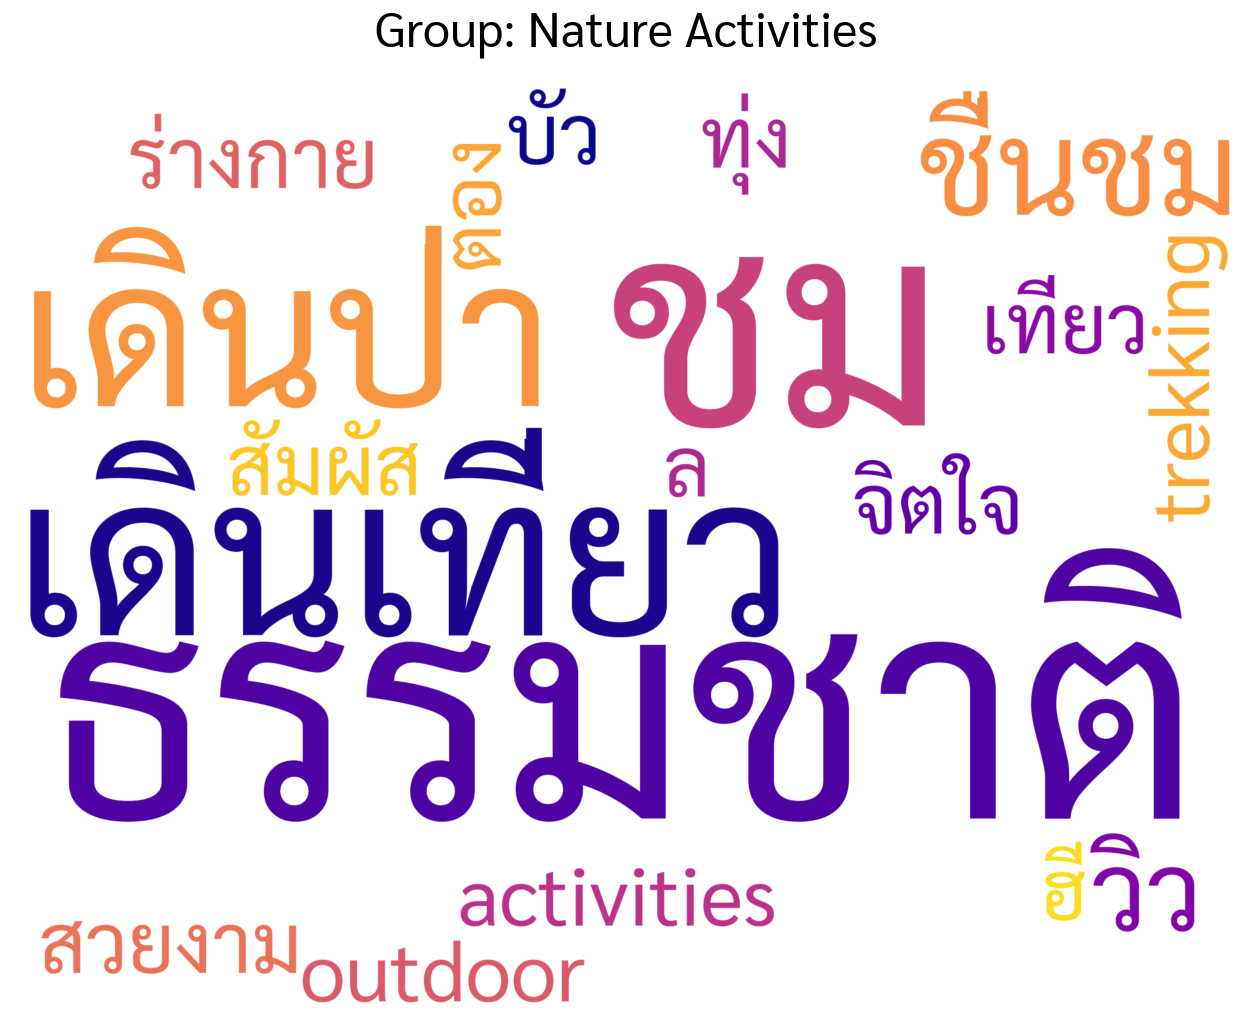

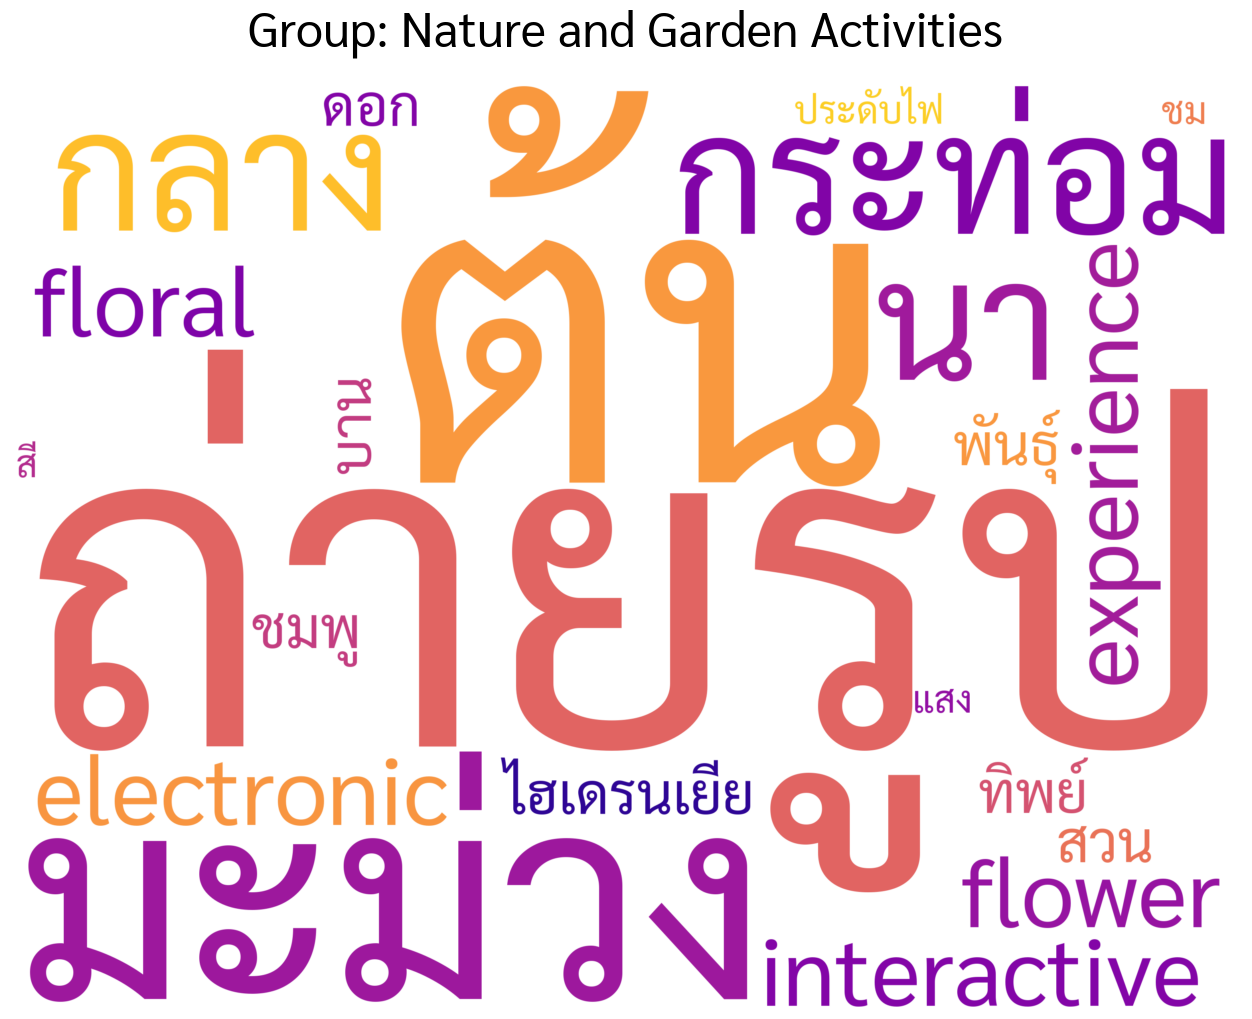

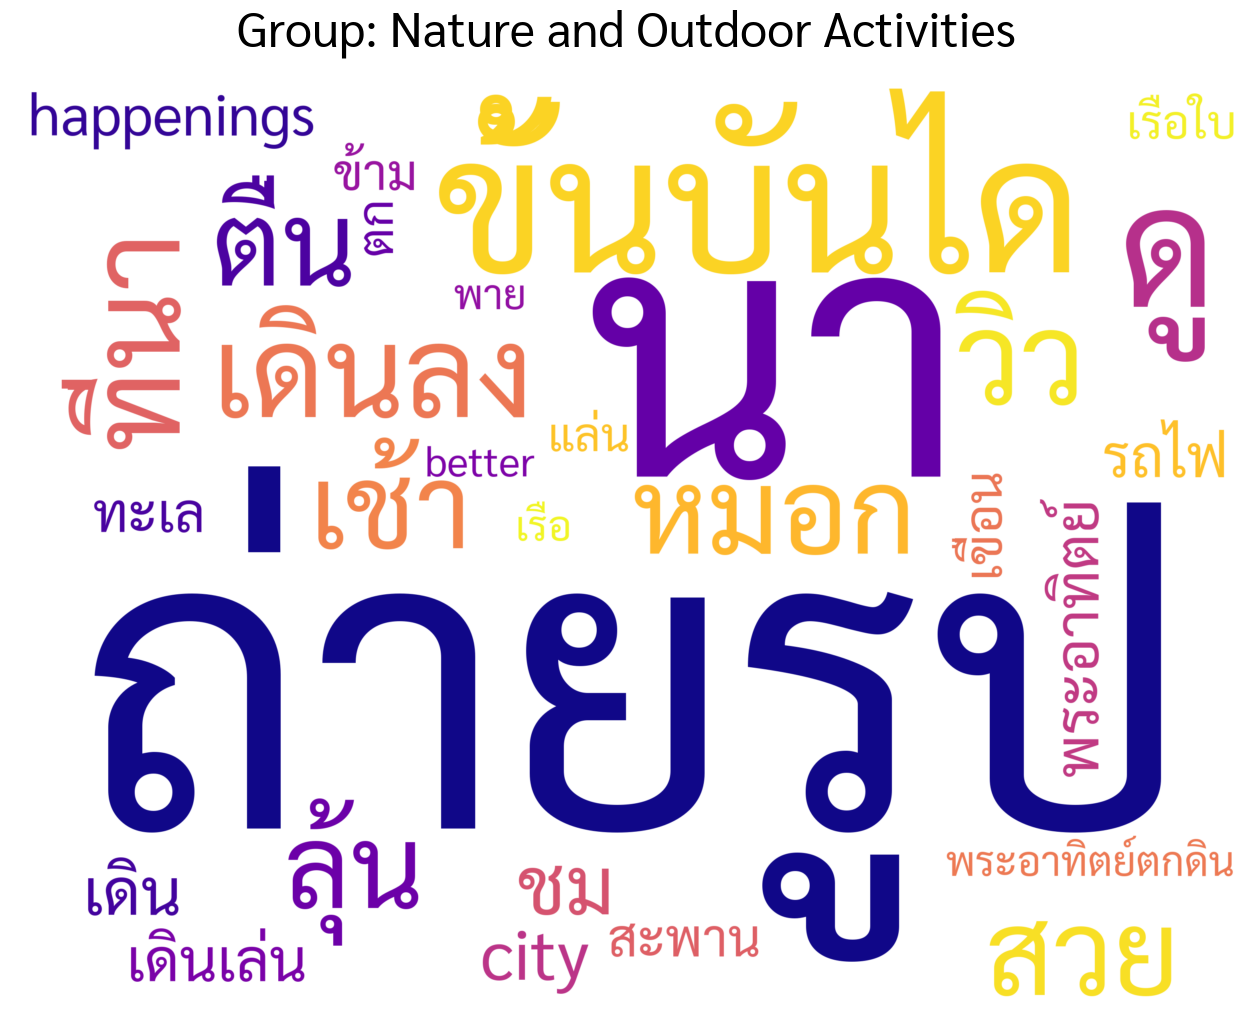

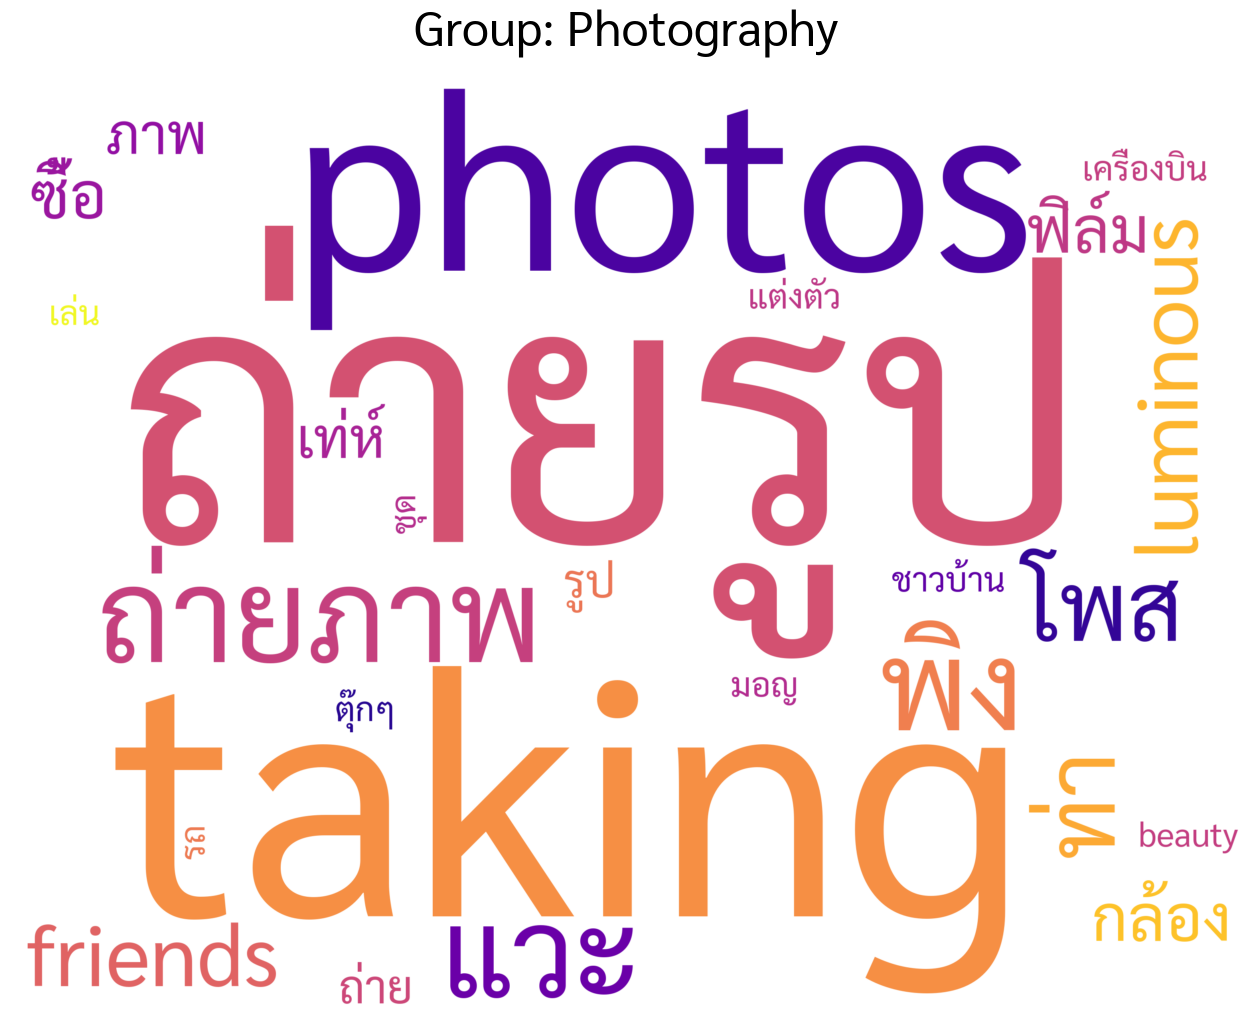

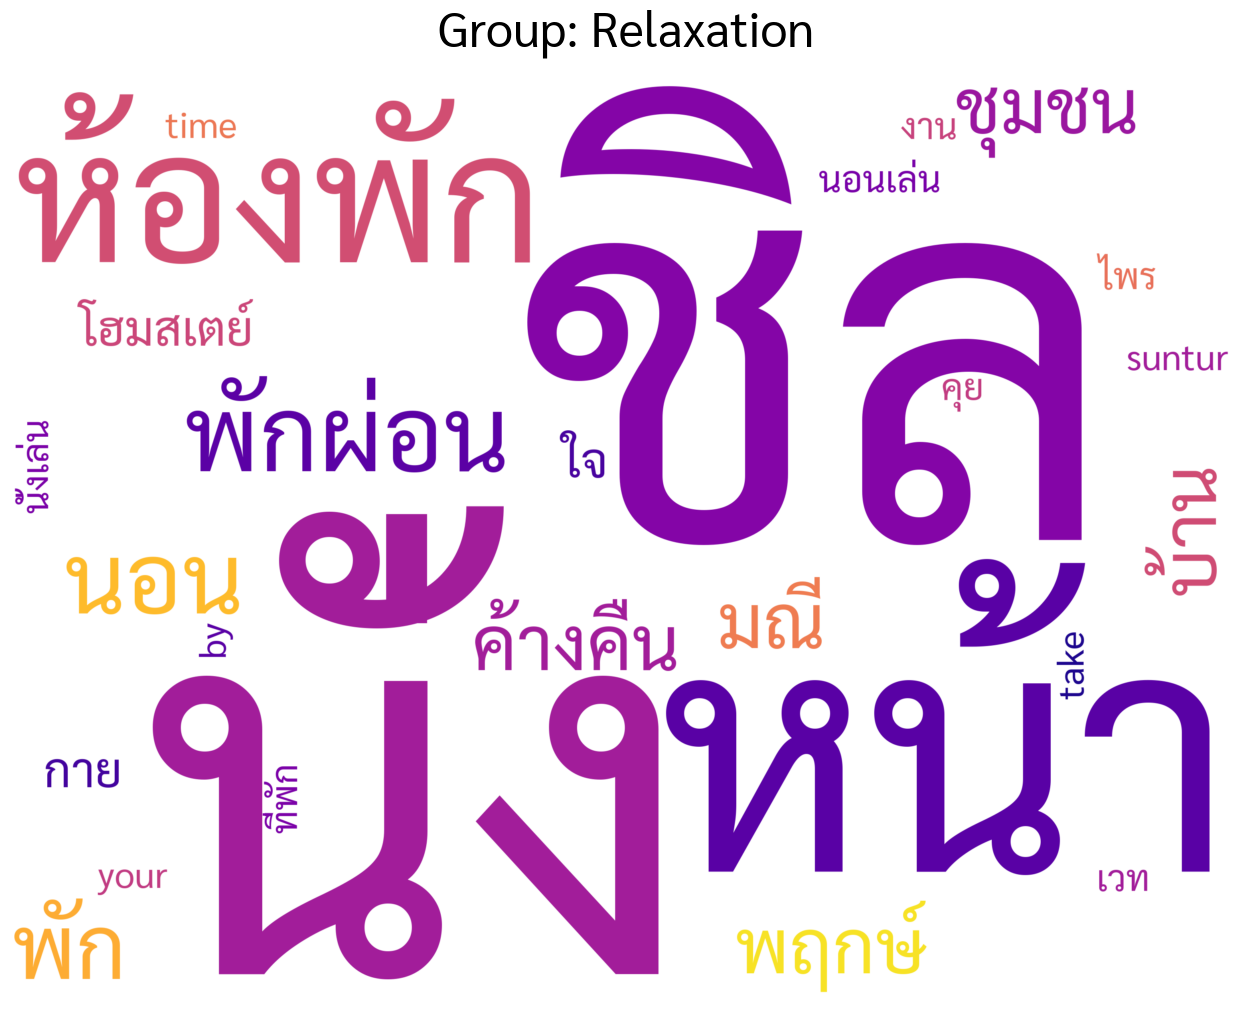

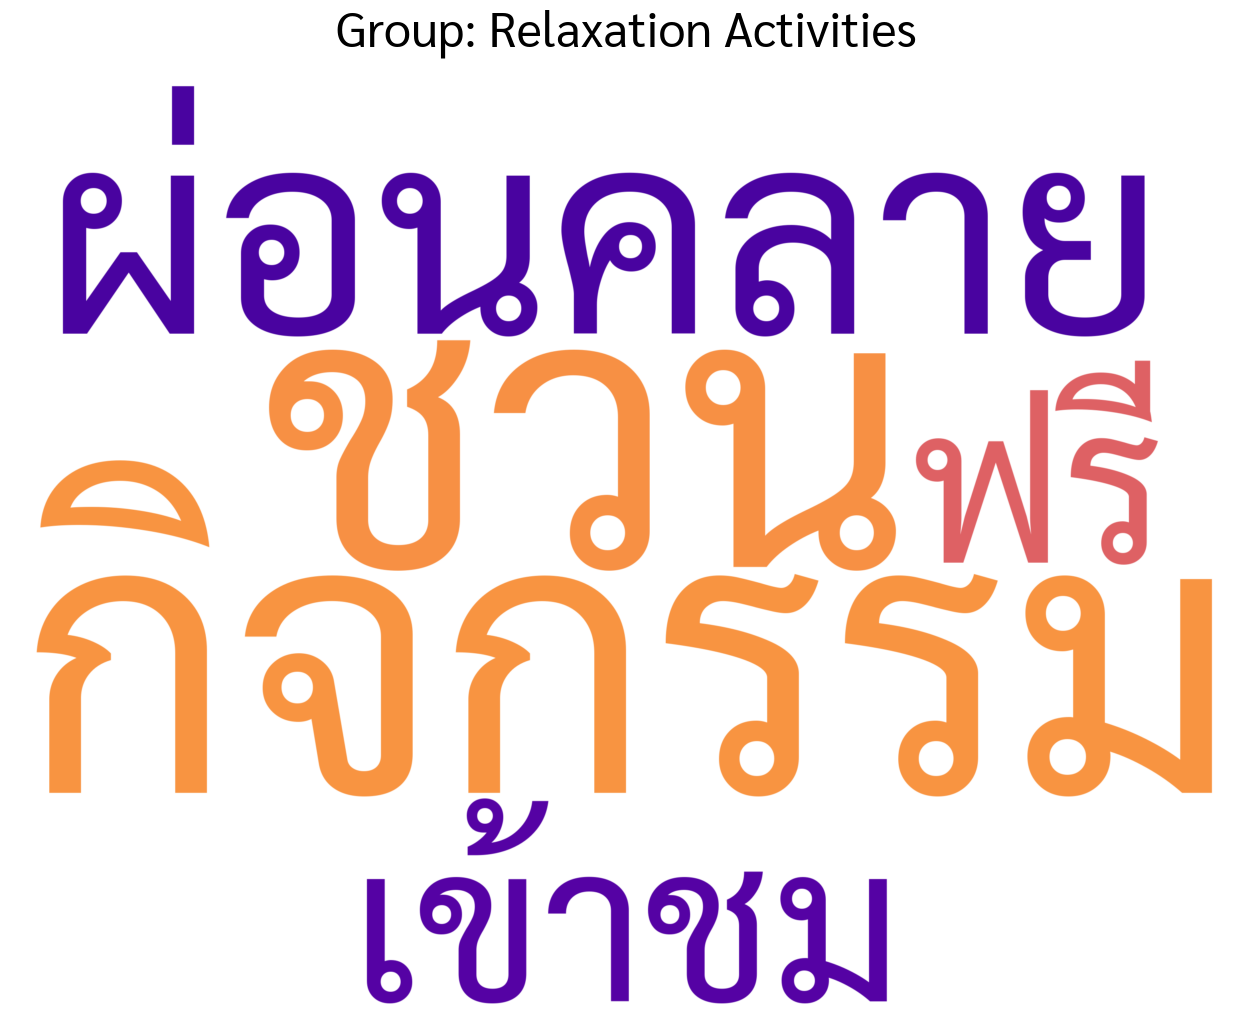

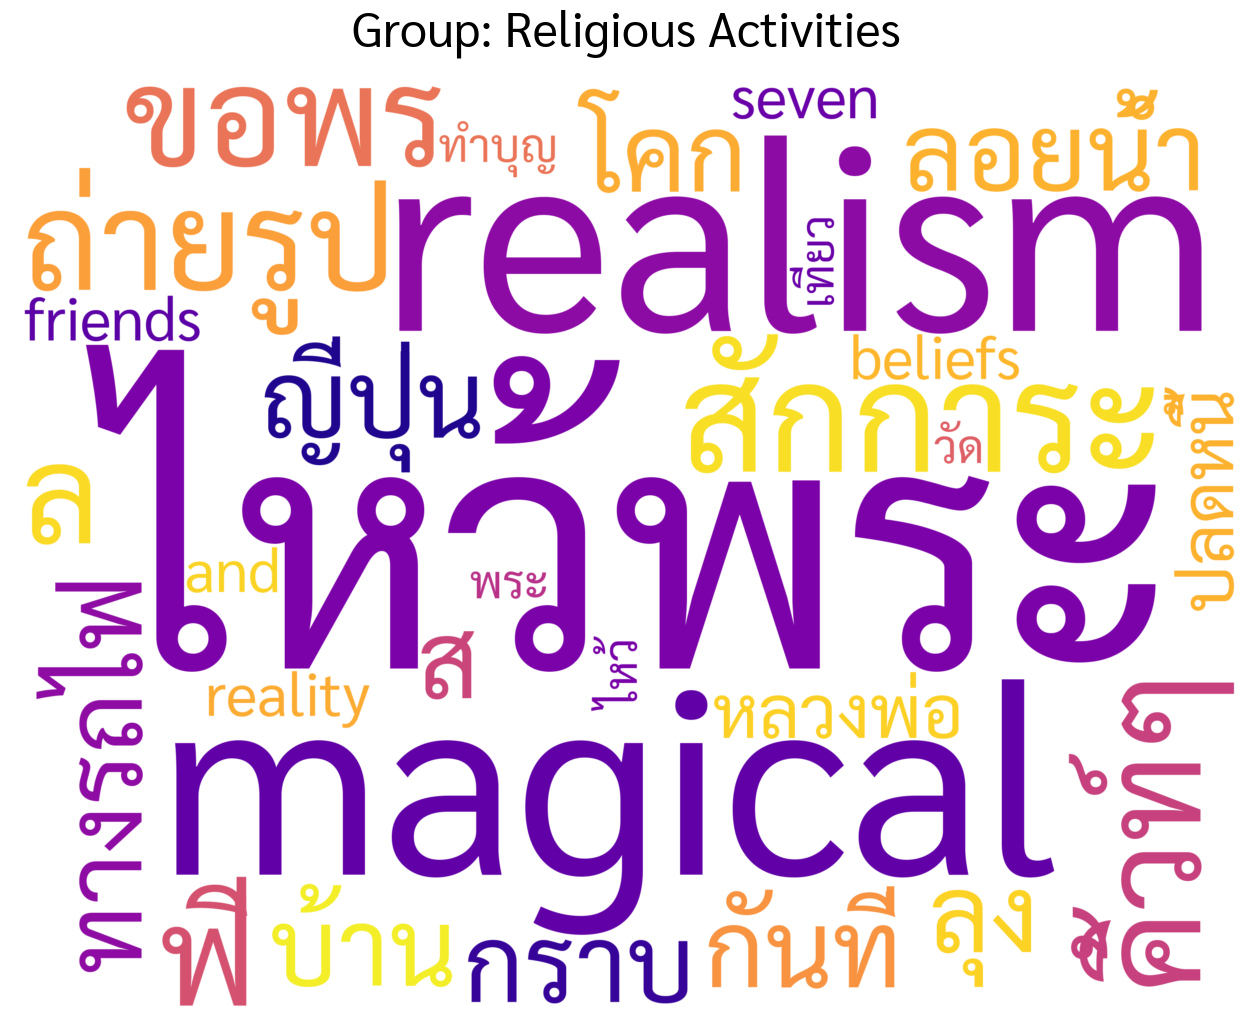

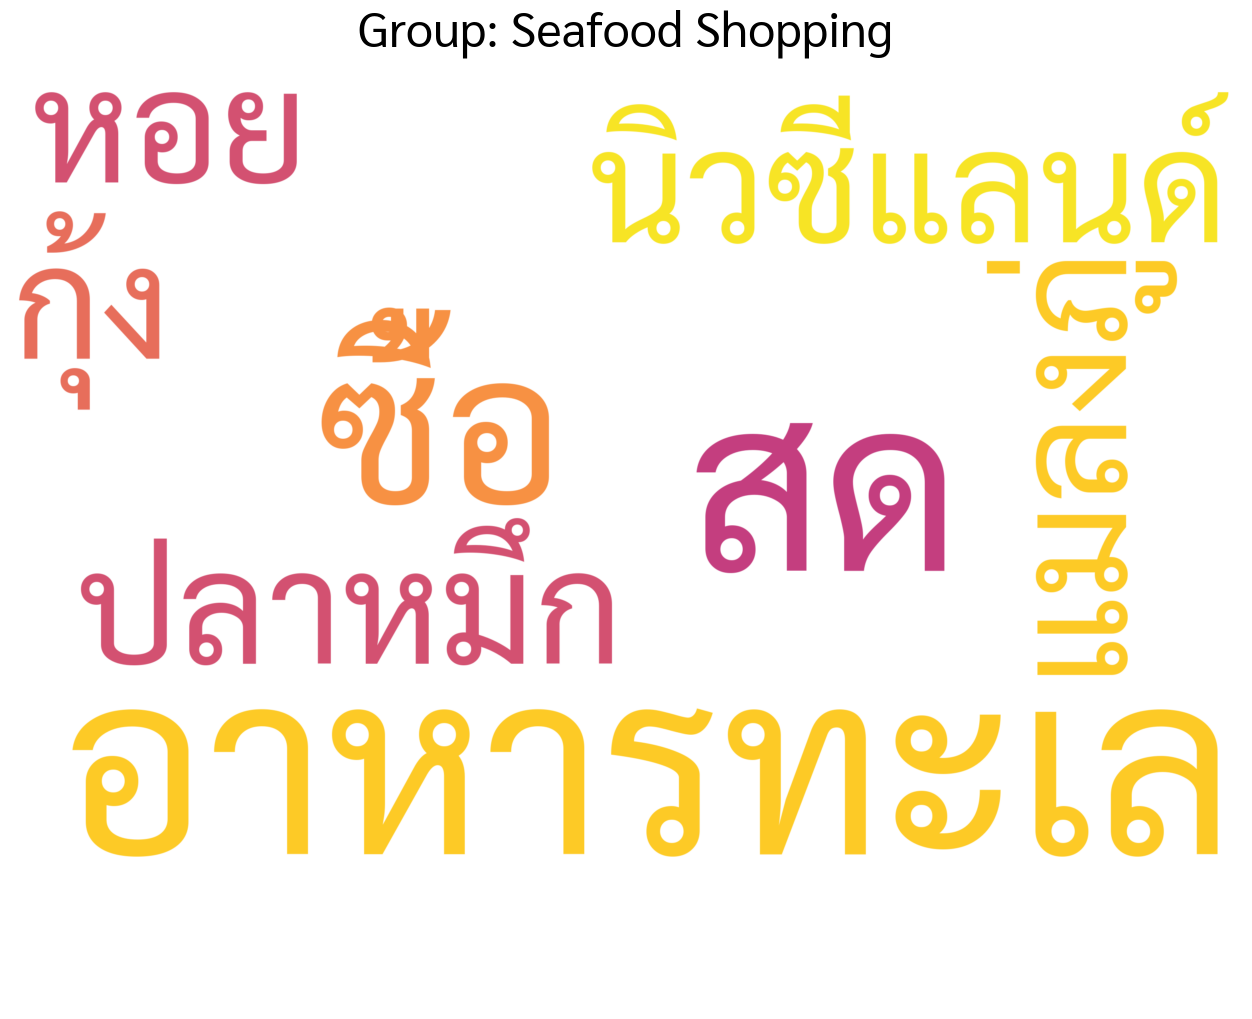

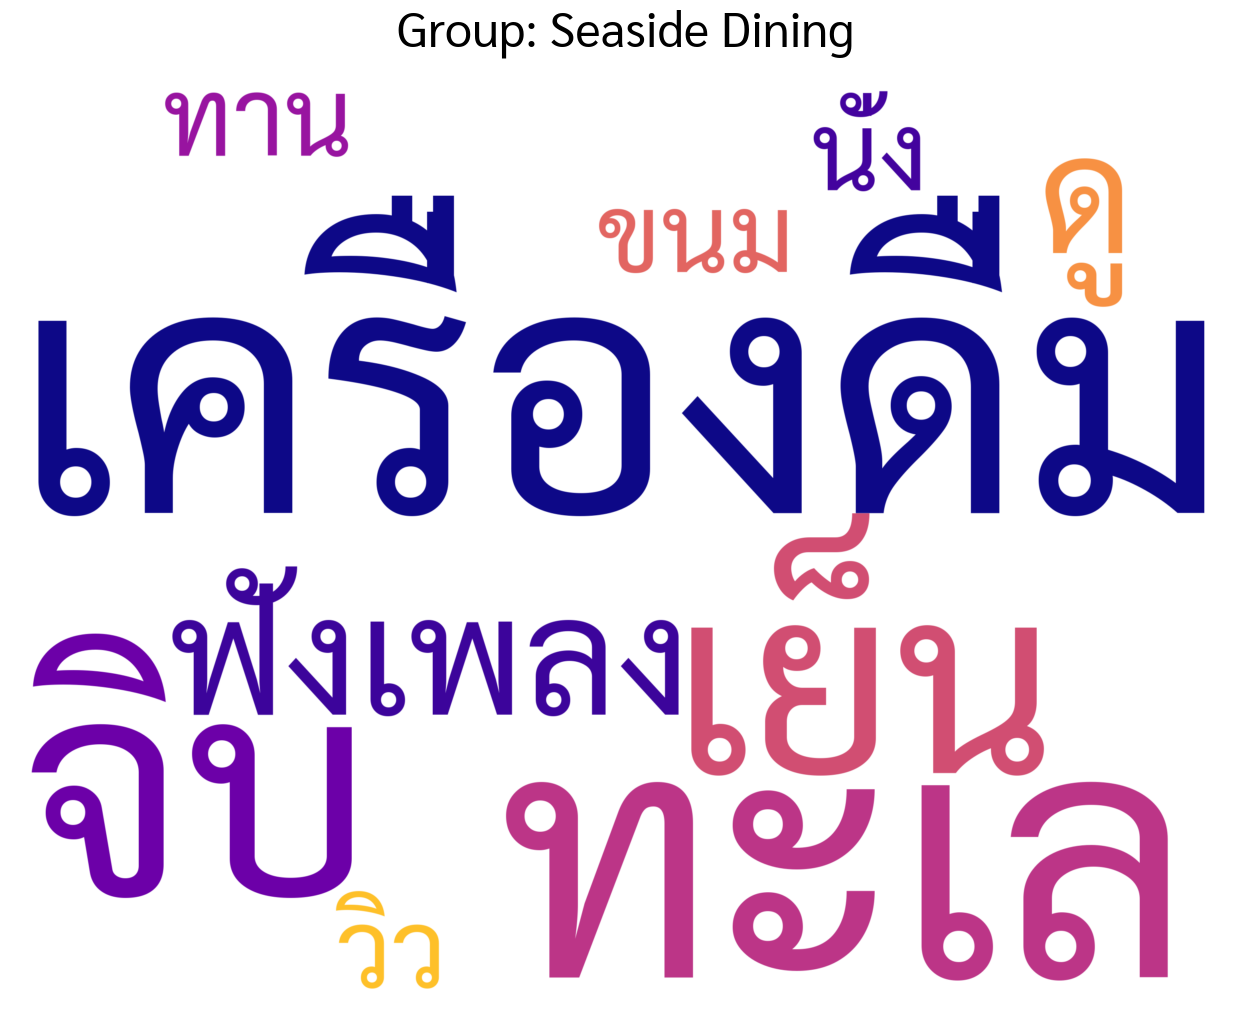

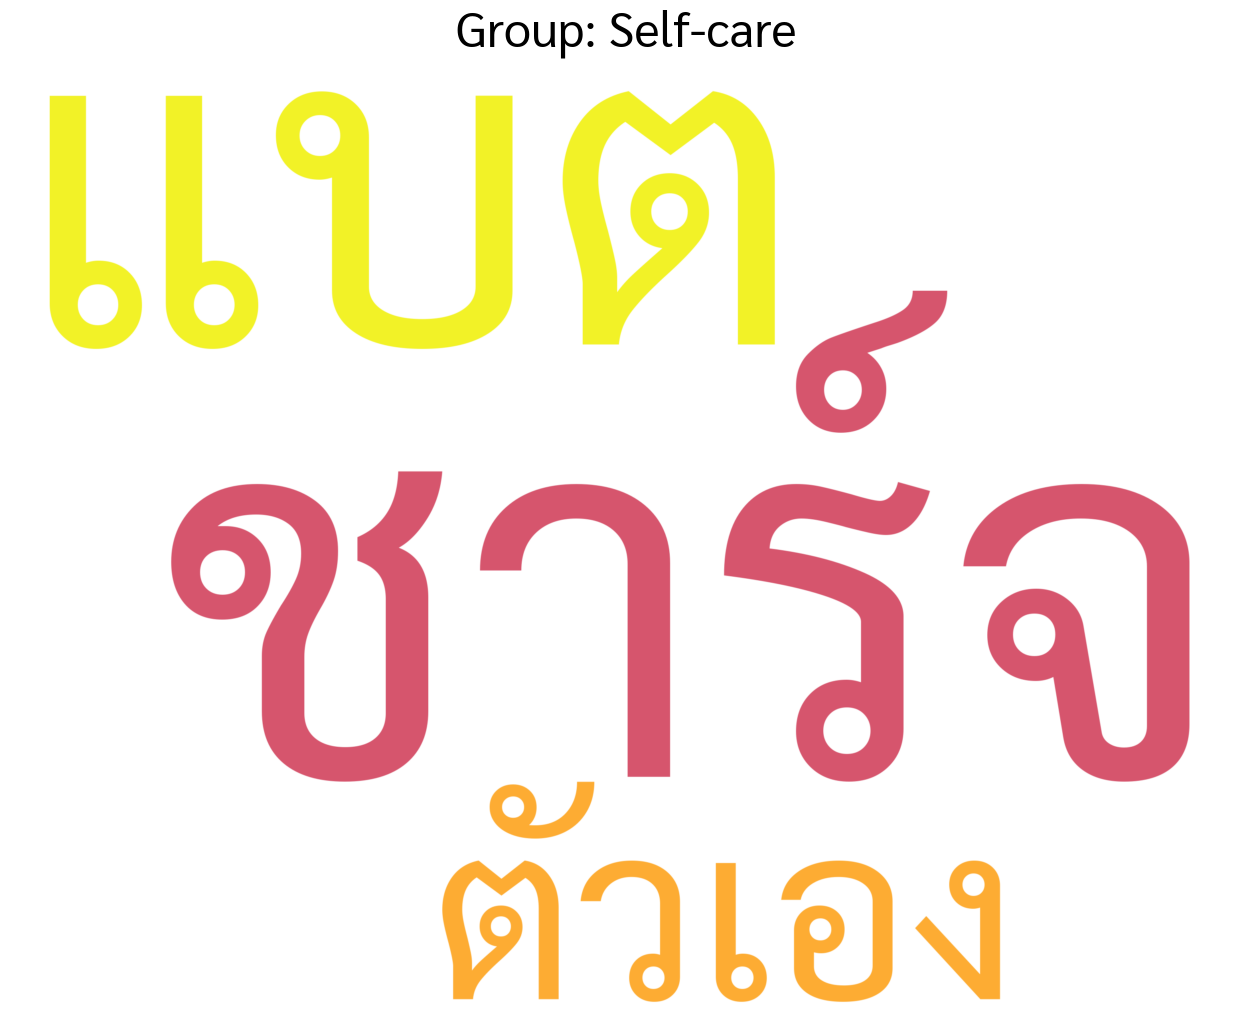

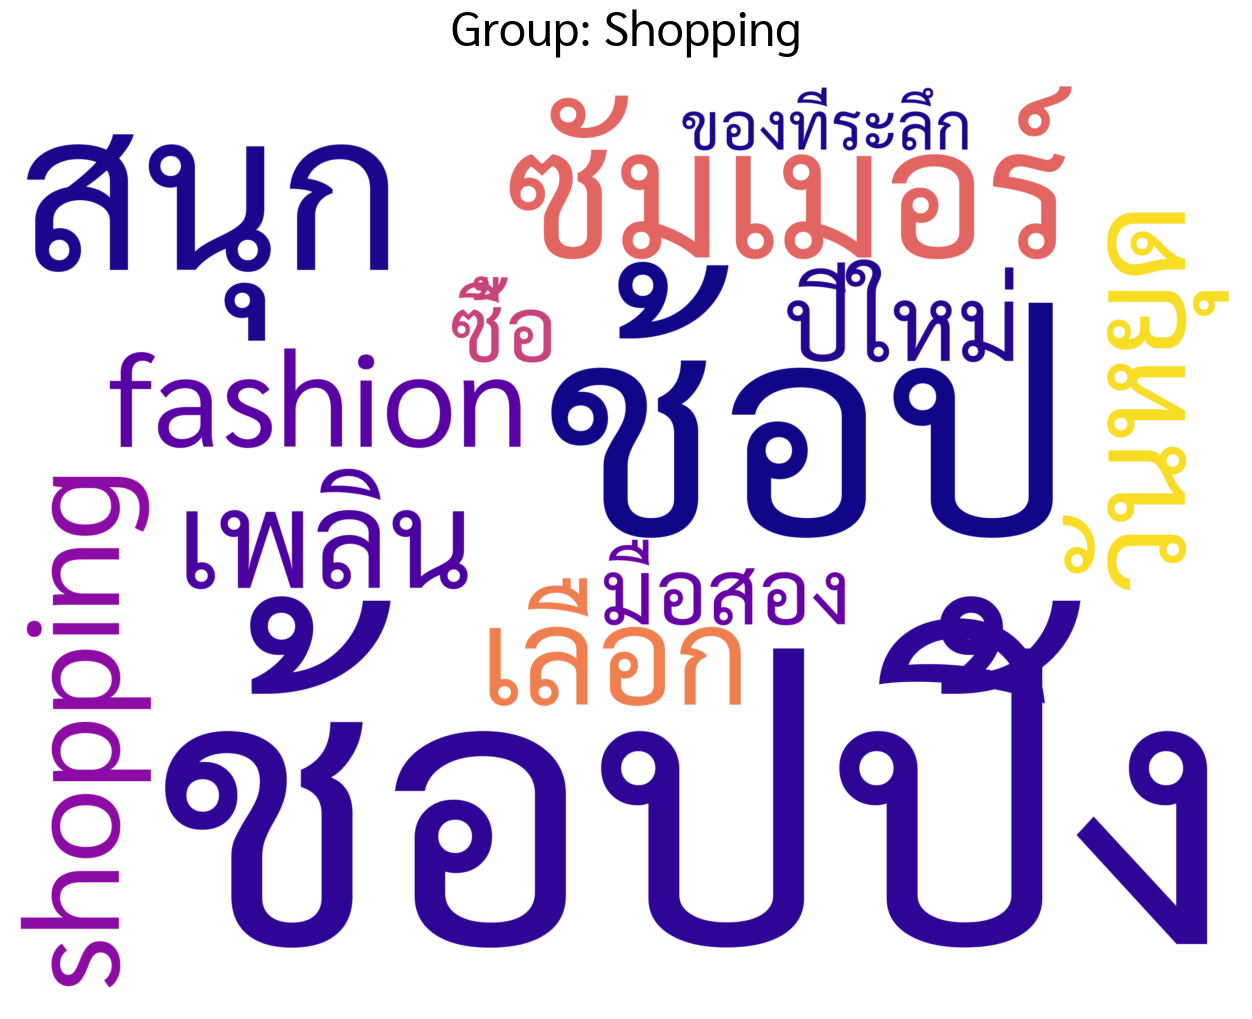

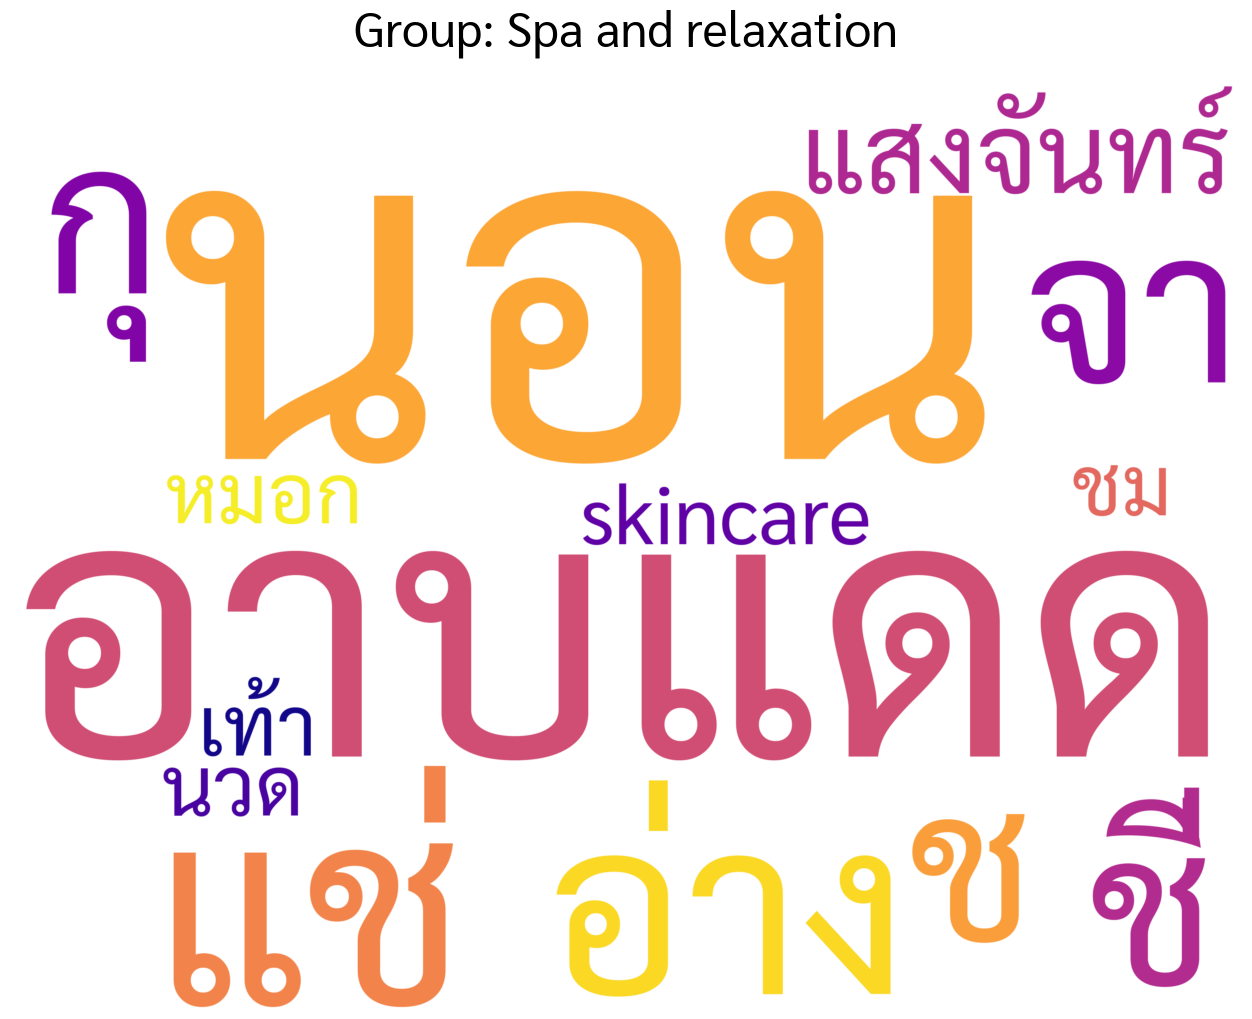

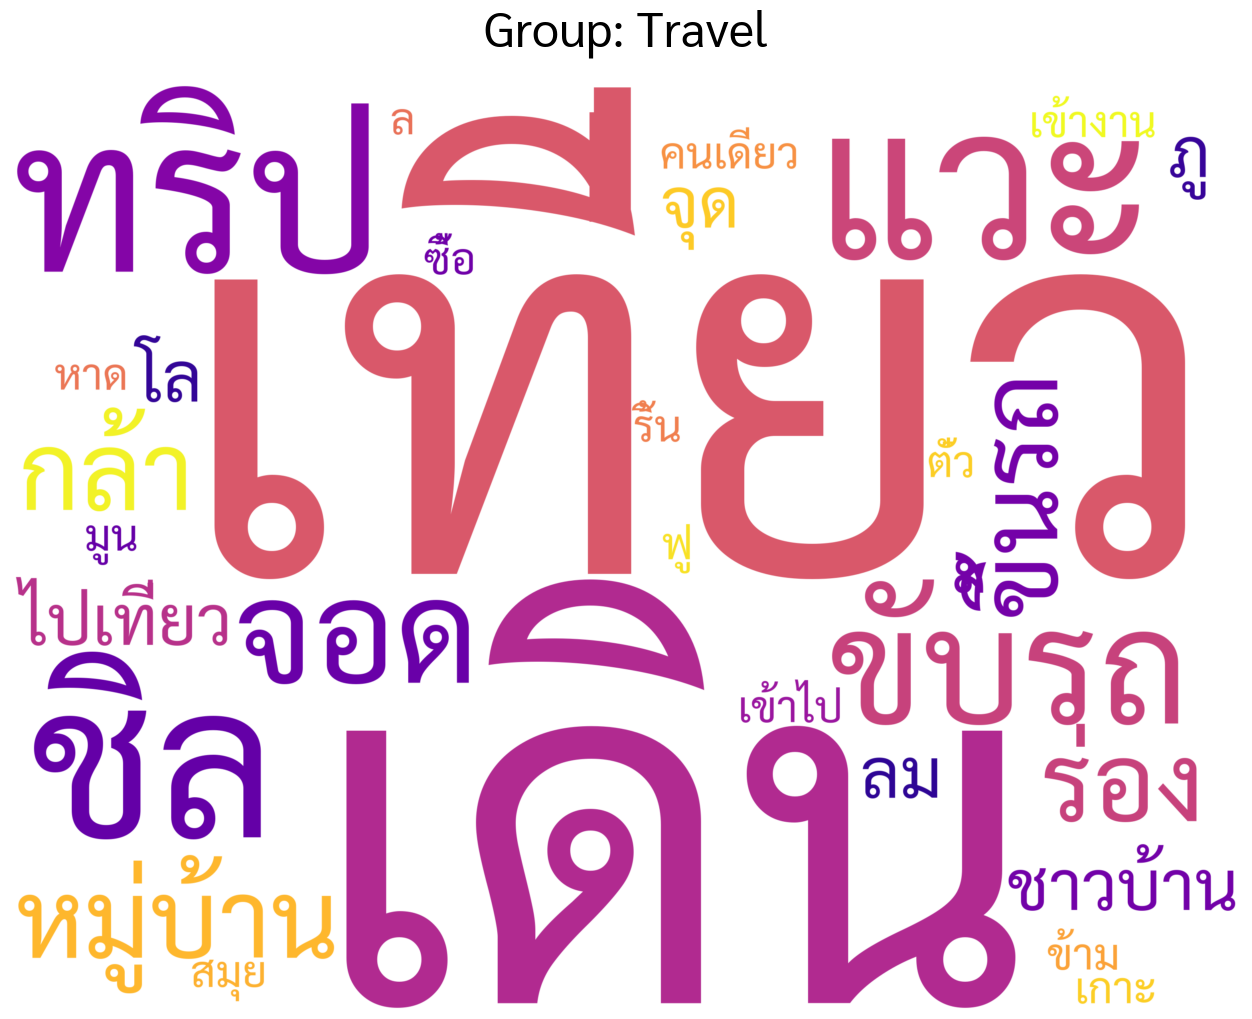

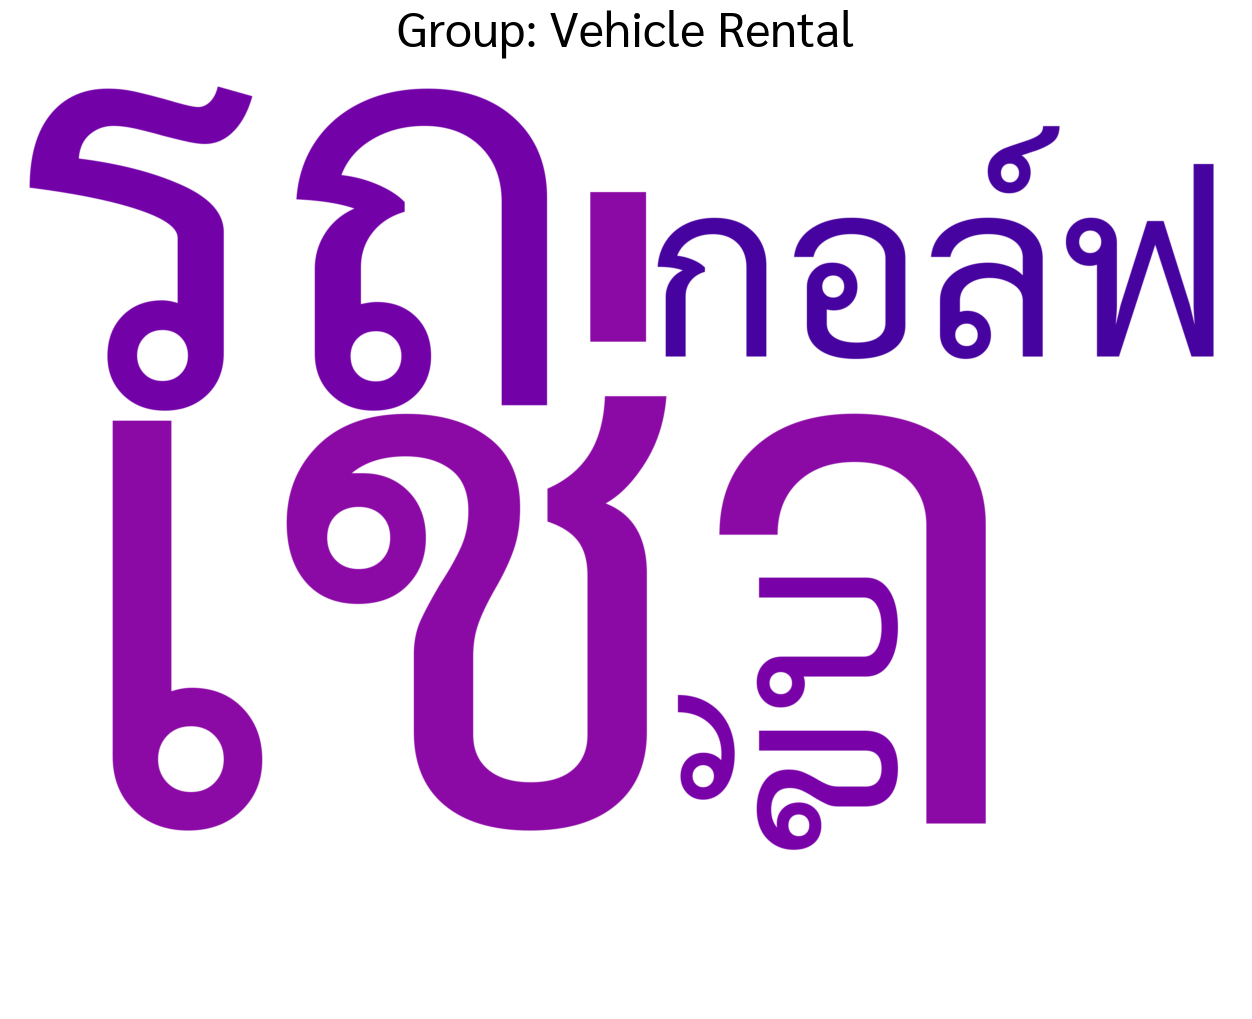

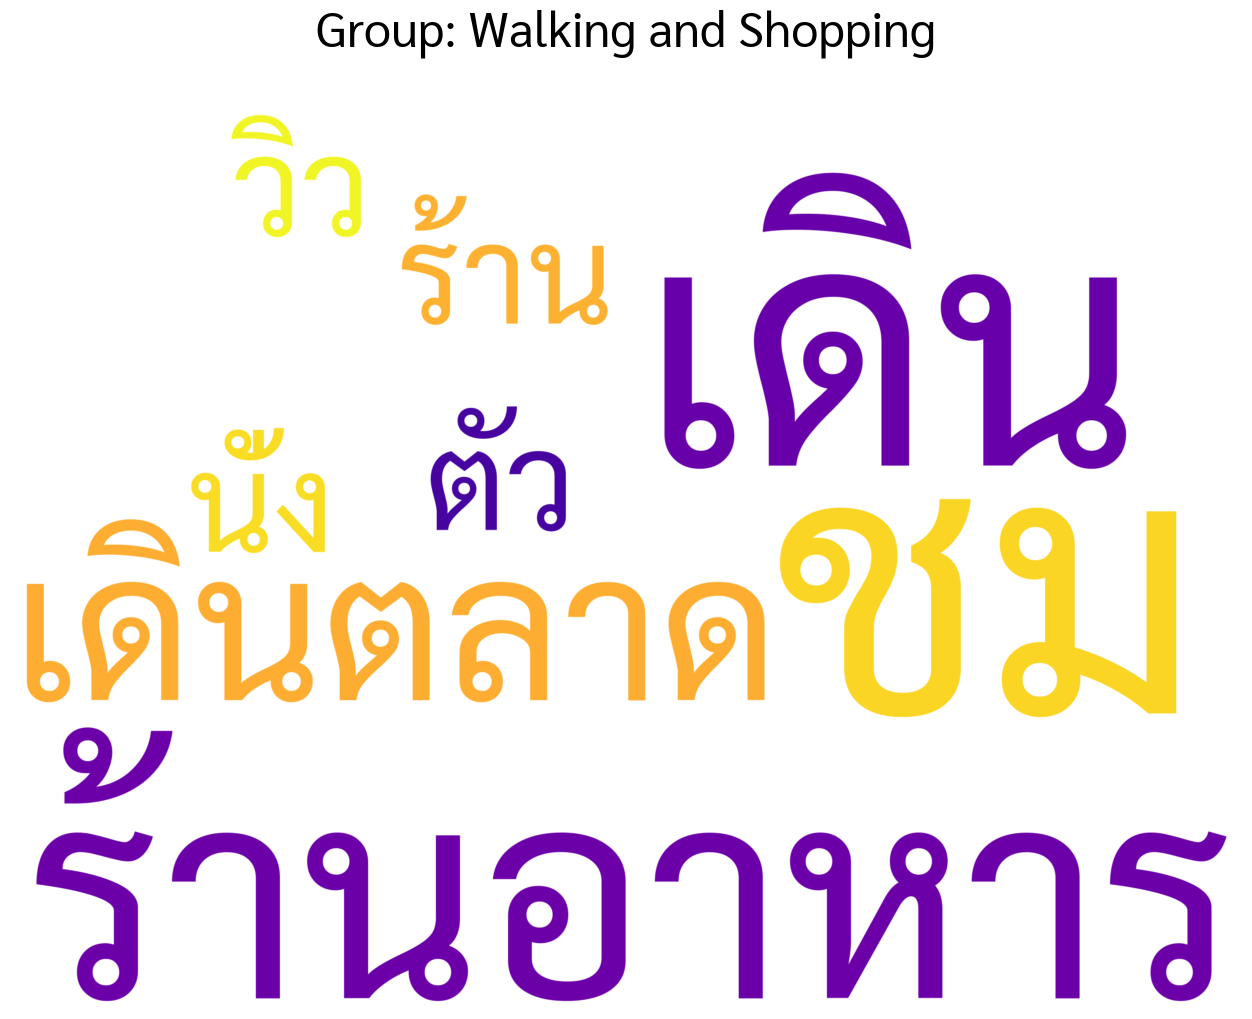

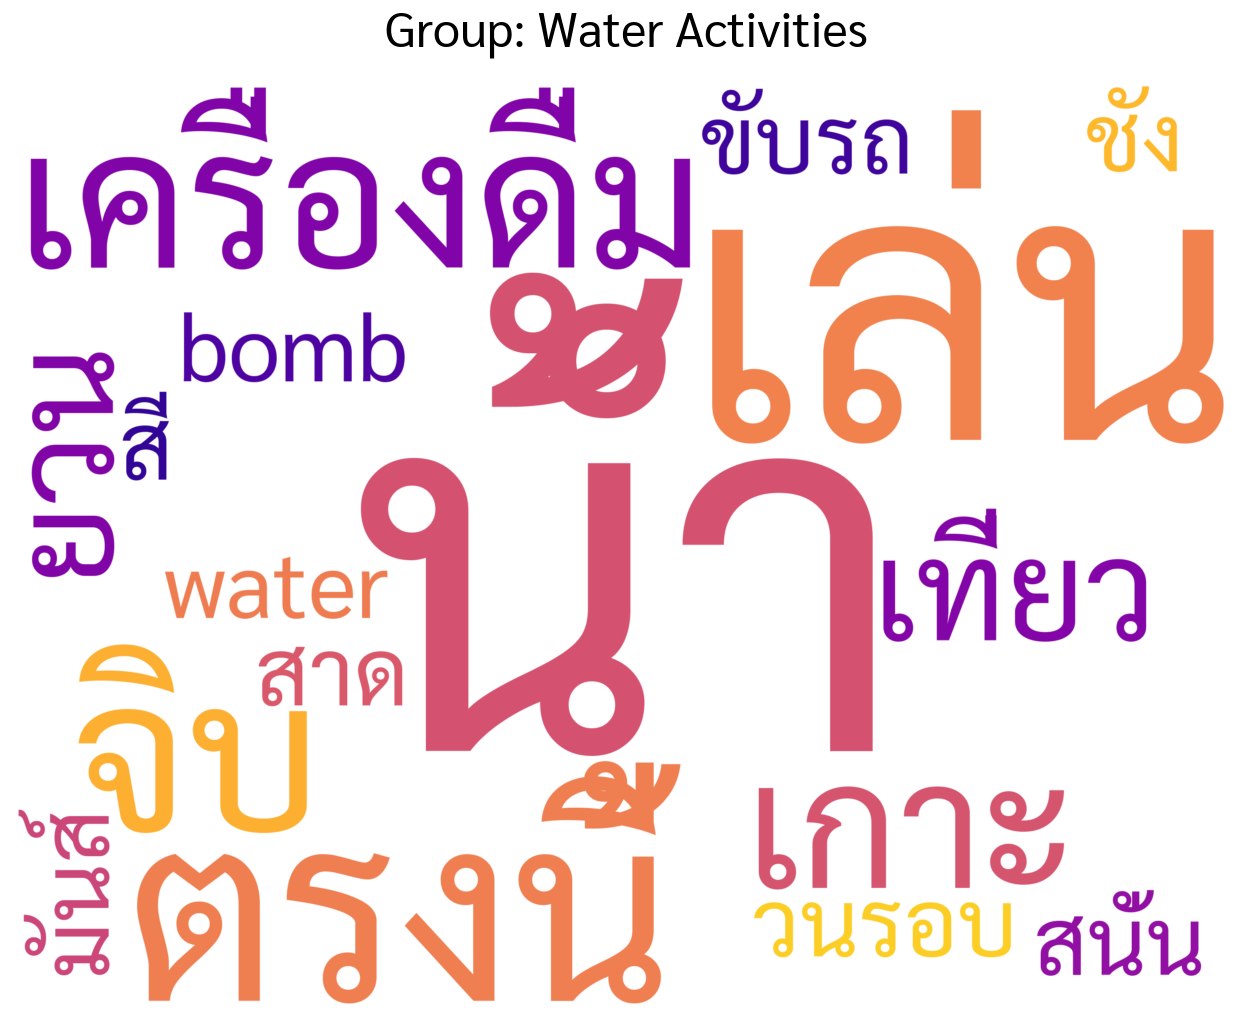

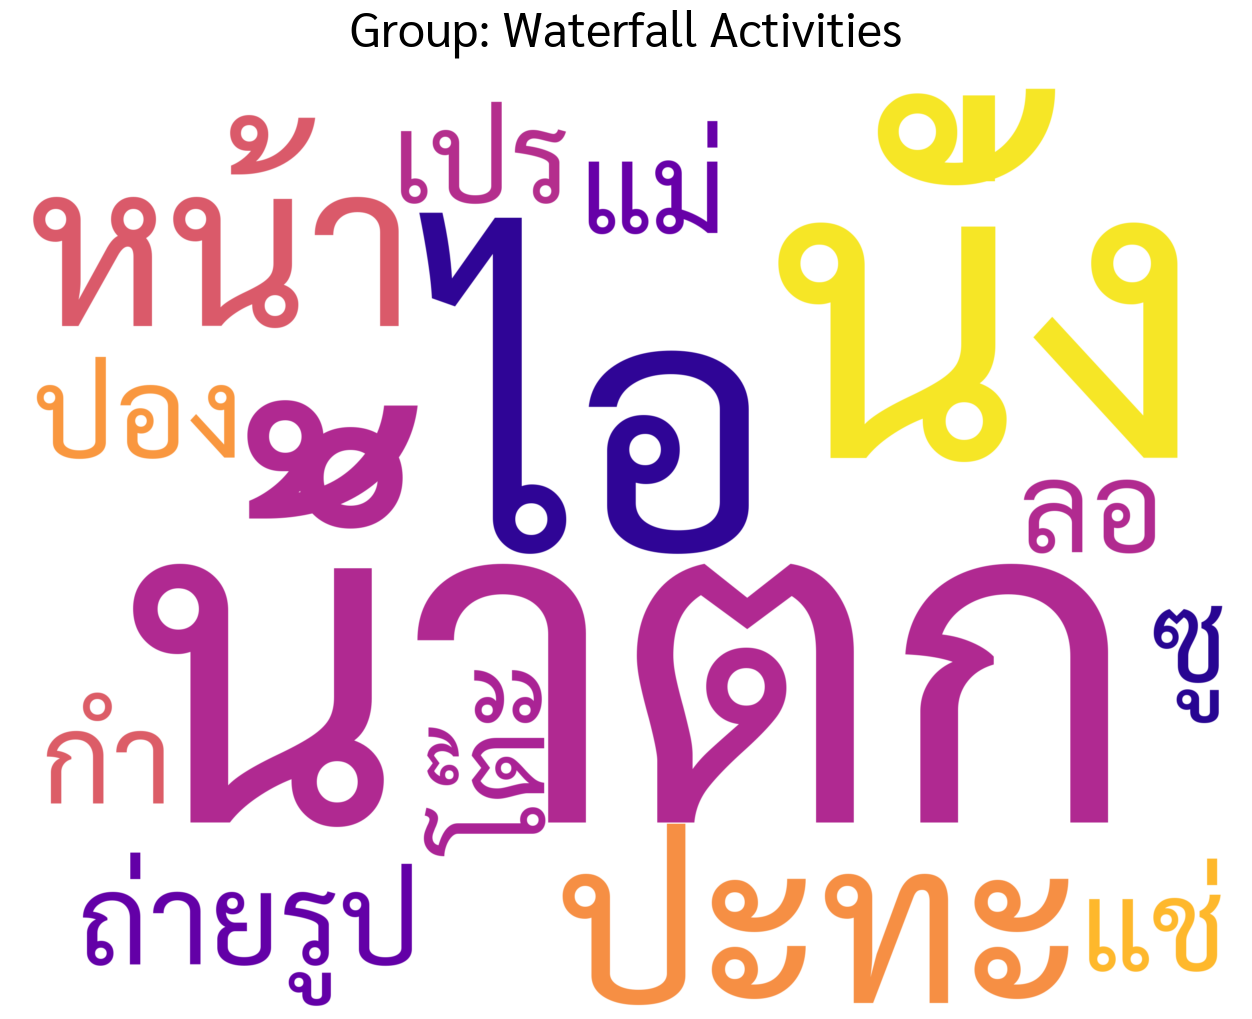

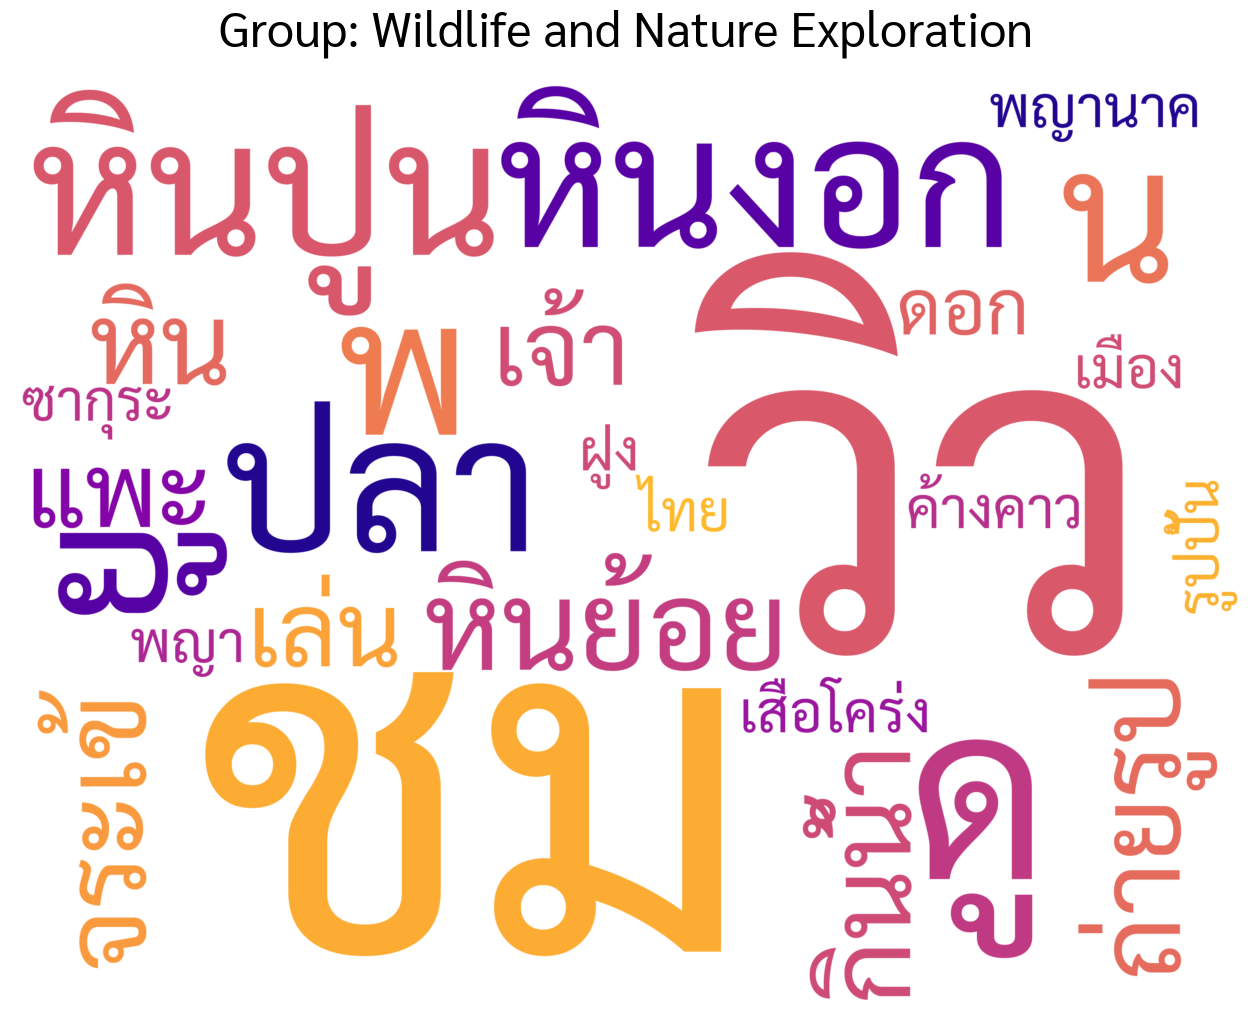

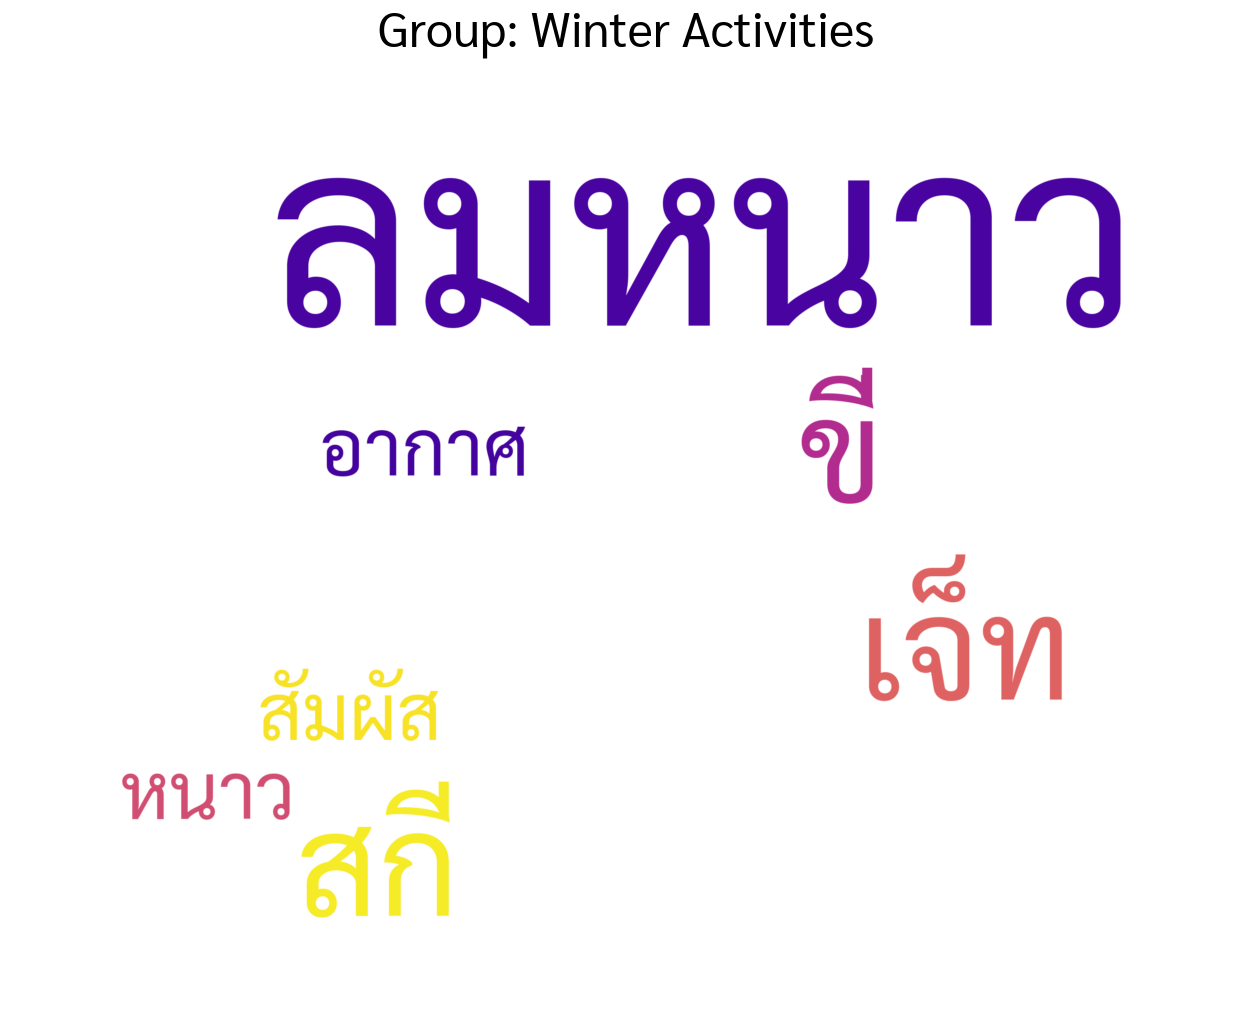

In [1045]:
wordcloud_output_path = './dataset/'+str(year)+'/activity_clustering/wordcloud/'

for index, label in tqdm(enumerate(unique(df.labels_desc.values))):
    try:
        observing_df = df[df['labels_desc'] == label]

        text = ''
        for row in observing_df['activity_name']:
            text = text + row.lower() + ' ' # เก็บข้อมูลรีวิวของเราทั้งหมดเป็น String ในตัวแปร text
        wt = word_tokenize(text, engine='newmm') # ตัดคำที่ได้จากตัวแปร text 
        print(text)
        print(wt)

        path = 'Sarabun-Regular.ttf' # ตั้ง path ไปหา font ที่เราต้องการใช้แสดงผล
        wordcloud = WordCloud(
                              font_path=path, # font ที่เราต้องการใช้ในการแสดงผล เราเลือกใช้ THSarabunNew 
                              stopwords=thai_stopwords(), # stop words ที่ใช้ซึ่งจะโดนตัดออกและไม่แสดงบน words cloud 
                              relative_scaling=0.5,
                              min_font_size=1,
                              background_color = "white",
                              width=1024,
                              height=768,
                              max_words=30, # จำนวนคำที่เราต้องการจะแสดงใน Word Cloud
                              colormap='plasma', 
                              scale=3,
                              font_step=4,
                              collocations=False,
                              regexp=r"[ก-๙a-zA-Z']+", # Regular expression to split the input text into token
                              margin=2
                              ).generate(' '.join(wt)) # input คำที่เราตัดเข้าไปจากตัวแปร wt ในรูปแบบ string

        fig, ax = plt.subplots(1, 1, figsize=(16, 12))
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis("off")
        label_desc = observing_df['labels_desc'].head(1).values[0]
        # Set the title
        ax.set_title(f"Group: {label_desc}", fontsize=35, pad=28)  # You can adjust the fontsize as needed

        # Save the figure
        fig.savefig(f'{wordcloud_output_path}label_{index}_{label_desc}.png')  # Saves the figure to the current working directory
    except:
        pass

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from pythainlp.tokenize import word_tokenize
from tqdm import tqdm
import numpy as np

# Your existing setup
wordcloud_output_path = './dataset/'+str(year)+'/activity_clustering/wordcloud/'

# Assuming 'unique', 'df', 'word_tokenize', and 'thai_stopwords' are defined
unique_labels = np.unique(df['labels_desc'].values)
n_rows = len(unique_labels) // 4 + int(len(unique_labels) % 4 != 0)

fig_height_per_row = 3.5  # Adjust this based on your content's needs
fig_width = 16
fig, axs = plt.subplots(n_rows, 4, figsize=(fig_width, n_rows * fig_height_per_row))

# Adjust layout parameters to reduce horizontal gap and fit content
plt.subplots_adjust(hspace=0.4, wspace=0.2)  # Reduce wspace as needed

for index, label in tqdm(enumerate(unique_labels), total=len(unique_labels)):
    observing_df = df[df['labels_desc'] == label]
    text = ' '.join(observing_df['activity_name'].str.lower())

    wt = word_tokenize(text, engine='newmm')

    path = 'Sarabun-Regular.ttf'
    wordcloud = WordCloud(
        font_path=path,
        stopwords=thai_stopwords(),
        relative_scaling=0.5,
        min_font_size=1,
        background_color="white",
        width=1024,
        height=768,
        max_words=100,
        colormap='plasma',
        scale=3,
        font_step=4,
        collocations=False,
        regexp=r"[ก-๙a-zA-Z']+",
        margin=2
    ).generate(' '.join(wt))

    # Determine the current subplot row & column
    row = index // 4
    col = index % 4

    axs[row, col].imshow(wordcloud, interpolation='bilinear')
    axs[row, col].axis("off")
    label_desc = observing_df['labels_desc'].iloc[0]
    axs[row, col].set_title(f"{label_desc}", fontsize=20, pad=10)

# Hide any unused axes if the number of plots is not a perfect fit
if len(unique_labels) % 4:
    for ax in axs.flat[len(unique_labels):]:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

# Note: Saving each individual word cloud as a separate file within the loop as before is possible,
# but if you want to save the entire grid as one image, use fig.savefig() after the loop.
fig.savefig(f'{wordcloud_output_path}all_wordclouds.png')

# Heatmap Activity Distribution by Itinerary Cluster

In [1005]:
# year = 2023
df = pd.read_csv(str(year)+'.csv') # โหลดข้อมูลไฟล์ Excel ของเรา
df = df[(df['activity_comb'] != '[()]') & (df['activity_comb'] != '[]')].reset_index(drop=True)

In [1006]:
def generate_groups(lists):
    for group in product(*lists):
        yield group

#Define a function to be applied to each partition
def primary_type_comb_process_partition(partition):
    partition = partition.reset_index(drop = True)
    # Extract mentioned activities along the places from text post by LLM
    for index, primaryType_itinerary_text in tqdm(enumerate(partition['rename_activity_comb'])):
        try:
            primaryType_itinerary_lists = ast.literal_eval(primaryType_itinerary_text)
            partition.loc[index, 'rename_activity_comb'] = primaryType_itinerary_lists
            partition.loc[index, 'activity_comb'] = ast.literal_eval(partition.loc[index, 'activity_comb'])
        except Exception as e:
            print(e)
    return partition

df = df.astype('object')
# Read the large DataFrame using Dask
_df = dd.from_pandas(df, npartitions=10)

# Apply the function to each partition in parallel
result_df = _df.map_partitions(primary_type_comb_process_partition).compute()
df = result_df.copy()
df = df.reset_index(drop=True)
df

2it [00:00, 3393.45it/s]


malformed node or string on line 1: <ast.Name object at 0x00000255026E0C10>
malformed node or string on line 1: <ast.Name object at 0x000002552C29E4A0>


0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]
0it [00:00, ?it/s]





0it [00:00, ?it/s]



0it [00:00, ?it/s]




0it [00:00, ?it/s]







0it [00:00, ?it/s]






0it [00:00, ?it/s]








0it [00:00, ?it/s]






27it [00:01, 22.24it/s][A
28it [00:01, 23.16it/s]
28it [00:01, 23.27it/s]
27it [00:01, 22.60it/s]
28it [00:01, 23.45it/s]
28it [00:01, 23.63it/s]
28it [00:01, 23.78it/s]
28it [00:01, 23.87it/s]
28it [00:00, 1342.70it/s]
28it [00:01, 23.96it/s]


urls       keyword  \
0    https://www.facebook.com/groups/paikondieow/pe...           ฤดู   
1    https://www.facebook.com/groups/paikondieow/pe...  unidentified   
2    https://www.facebook.com/groups/paikondieow/pe...  unidentified   
3    https://www.facebook.com/groups/paikondieow/pe...         สิงหา   
4    https://www.facebook.com/groups/paikondieow/pe...         สิงหา   
..                                                 ...           ...   
273  https://www.facebook.com/share/p/ahKPxsMNEgzrg...          trip   
274  https://www.facebook.com/groups/paikondieow/pe...            กพ   
275  https://www.facebook.com/groups/paikondieow/pe...            กพ   
276  https://www.facebook.com/groups/paikondieow/pe...         สิงหา   
277  https://www.facebook.com/groups/paikondieow/pe...            ฝน   

                                                  text  \
0    ท่ามกลางท้องฟ้าอันสดใสและผืนทะเลสีครามของต้นฤด...   
1    Gamping คูล ๆ นอนรถบ้านริมทะเลที่เดียวในสัตหีบ...   
2    Gamping คูล ๆ นอนรถบ้านริมทะเลที่เดียวในสัตหีบ...   
3    12 พิกัด มาเก๊า-จูไห่ บินเที่ยวสบายๆ ไม่ต้องทำ...   
4    12 พิกัด มาเก๊า-จูไห่ บินเที่ยวสบายๆ ไม่ต้องทำ...   
..                                                 ...   
273  งามแต้..เมืองแป้หน้าฝนจ้าววว ยิ่งรู้จักยิ่งหลง...   
274  เที่ยวปีใหม่ที่เชียงรายค่ะหลงรักไม่ไหว อยากย้า...   
275  เที่ยวปีใหม่ที่เชียงรายค่ะหลงรักไม่ไหว อยากย้า...   
276  โรงแรมสุดชิล มาพร้อมรูฟท็อปวิวหาดพัทยาสุดปัง "...   
277  ทุ่งนา ภูเขา ลำธาร #บ่อเกลือ #น่าน ถ้าชอบบรรยา...   

                                                places  \
0    ["เกาะมัน", "เกาะมันใน", "เกาะมันกลาง", "เกาะม...   
1    ["หาด EOD สัตหีบ", "หาดน้ำใส", "หาดดงตาล", "ตล...   
2    ["หาด EOD สัตหีบ", "หาดน้ำใส", "หาดดงตาล", "ตล...   
3    ["มาเก๊า", "จูไห่", "PONTO SQUARE", "อนุสรณ์สถ...   
4    ["มาเก๊า", "จูไห่", "PONTO SQUARE", "อนุสรณ์สถ...   
..                                                 ...   
273  ["จังหวัดแพร่", "วัดพระธาตุอินทร์แขวน", "จังหว...   
274  ["เชียงราย", "โรงแรมวังคำ", "สวนดอกไม้", "หอนา...   
275  ["เชียงราย", "โรงแรมวังคำ", "สวนดอกไม้", "หอนา...   
276  ["พัทยา", "ชายหาด", "พัทยาเหนือ", "บางละมุง", ...   
277  ["บ่อเกลือ", "น่าน", "บ่อเกลือโบราณ", "บ้านผาค...   

                                           place_infos  \
0    [{'types': ['natural_feature', 'establishment'...   
1    [{'types': ['natural_feature', 'establishment'...   
2    [{'types': ['natural_feature', 'establishment'...   
3    [{'types': ['clothing_store', 'store', 'point_...   
4    [{'types': ['clothing_store', 'store', 'point_...   
..                                                 ...   
273  [{'types': ['tourist_attraction', 'place_of_wo...   
274  [{'types': ['hotel', 'lodging', 'point_of_inte...   
275  [{'types': ['hotel', 'lodging', 'point_of_inte...   
276  [{'types': ['tourist_attraction', 'point_of_in...   
277  [{'types': ['tourist_attraction', 'point_of_in...   

                                       filtered_places  \
0    ['เกาะมัน', 'เกาะมันใน', 'เกาะมันกลาง', 'เกาะม...   
1    ['หาด EOD สัตหีบ', 'หาดน้ำใส', 'หาดดงตาล', 'ตล...   
2    ['หาด EOD สัตหีบ', 'หาดน้ำใส', 'หาดดงตาล', 'ตล...   
3    ['PONTO SQUARE', 'หวี่นี่', 'ตลาดใต้ดินก๊งเป่ย...   
4    ['PONTO SQUARE', 'หวี่นี่', 'ตลาดใต้ดินก๊งเป่ย...   
..                                                 ...   
273  ['วัดพระธาตุอินทร์แขวน', 'พระธาตุอินทร์แขวน', ...   
274  ['โรงแรมวังคำ', 'หอนาฬิกา', 'ตลาดไนท์บราซ่า', ...   
275  ['โรงแรมวังคำ', 'หอนาฬิกา', 'ตลาดไนท์บราซ่า', ...   
276                      ['ชายหาด', 'M Pattaya Hotel']   
277              ['บ่อเกลือโบราณ', 'บ้านผาคับ', 'Nan']   

                                filtered_rename_places  \
0    ['Ko Man Nork', 'Ko Man Nai', 'Ko Man Klang', ...   
1    ['Nang Rong Beach', 'Nam Sai Beach', 'Dongtan ...   
2    ['Nang Rong Beach', 'Nam Sai Beach', 'Dongtan ...   
3    ['PRONTO Siam square soi 2', 'ไอ-มี่ ชาบู', 'S...   
4    ['PRONTO Siam square soi 2', 'ไอ-มี่ ชาบู', 'S...   
..                                               

In [1007]:
major_activity_df = df.explode('rename_activity_comb').explode('rename_activity_comb').drop_duplicates(['urls','text','rename_activity_comb', 'labels'], keep='first').reset_index(drop=True)[['rename_activity_comb', 'labels']]
major_activity_df

rename_activity_comb labels
0                       Relaxation      6
1            Relaxation Activities      6
2                Nature Activities      6
3               Spa and relaxation      5
4    Nature and Outdoor Activities      5
..                             ...    ...
508                Food and Dining      5
509               Seafood Shopping      5
510  Nature and Outdoor Activities      5
511                 Seaside Dining      5
512                        Camping      0

[513 rows x 2 columns]

In [1008]:
best_clusters = list(sorted(pd.read_csv('dataset/'+str(year)+'/place_clustering/pattern/best_clusters.csv')['cluster number'].tolist()))
best_clusters

[1, 4, 5, 6, 8, 11, 12, 13]

In [1009]:
import pickle
with open('dataset/'+str(year)+'/place_clustering/pattern/cluster_dict.pkl', 'rb') as f:
    cluster_dict = pickle.load(f)

In [1010]:
best_clusters = list(cluster_dict.keys())
best_clusters, len(best_clusters)

([10, 6, 5, 8, 3, 9, 13, 0, 12, 4, 2, 7, 11, 1, 14], 15)

In [1011]:
major_activity_df = major_activity_df[major_activity_df['labels'].isin(best_clusters)]
len(major_activity_df['labels'].unique())
# major_activity_df = major_activity_df

15

In [1012]:
# major_activity_df[(major_activity_df['rename_activity_comb'] == activity) & (major_activity_df['labels'] == label)].count()[0]

In [1013]:
# len(major_activity_df[(major_activity_df['labels'] == label)])

In [1014]:
major_activity_df['value'] = 1
count_df = pd.DataFrame({'activity': [], 'label': [], 'prob': []})

In [1015]:
count_df

Empty DataFrame
Columns: [activity, label, prob]
Index: []

In [1016]:
activity_type = [ 'NONE',
 'Food and Dining',
 'Religious Activities',
 'Nature and Outdoor Activities',
  'Relaxation',
 'Camping',
 'Shopping',
'Camping',
  'Vehicle Rental',
'Nature Activities',
 'Photography',
 'Beach Activities',
 'Water Activities',
 'Beverage Consumption',
  'Relaxation',
 'Coffee Activities',
  'Nature and Garden Activities',
'Wildlife and Nature Exploration',
 'Food Market',
  'Mountain Activities',
  'Art Exhibitions',
 'Waterfall Activities',
 'Seaside Dining',
 'Cycling',
 'Music Festival',
 'Water Activities',
 'Cultural and Agricultural Learning',
 'Travel',
 'Animal Encounters',
  'Cave Exploration',
  'Cooking and Animal Care',
 'Puppetry',
  'Online Train Ticket Booking',
 'Relaxation Activities',
'Moomin Activities',
 'Winter Activities',
 'Walking and Shopping',
  'Elephant Watching',
  'Spa and relaxation',
  'Golf',
 'Self-care',
'Seafood Shopping',
 'Relaxation',
'Rooftop bar',
 'Chinese New Year']

In [1017]:
# count_dict = {activity:[] for activity in list(sorted(major_activity_df['rename_activity_comb'].dropna().unique()))}
count_dict = {activity: [] for activity in list(sorted(activity_type))}

In [1018]:
# count_dict

In [1019]:
for activity in count_dict.keys():
    for label in major_activity_df['labels'].unique():
    # for label in list(color_discrete_map.keys()):
        prob = len(major_activity_df[(major_activity_df['rename_activity_comb'] == activity) & (major_activity_df['labels'] == label)]) / len(major_activity_df[(major_activity_df['labels'] == label)]) * 100
        count_df.loc[len(count_df.index)] = [activity, label, prob]
count_df

activity  label      prob
0    Animal Encounters      6  0.000000
1    Animal Encounters      5  0.000000
2    Animal Encounters      8  0.000000
3    Animal Encounters      3  0.000000
4    Animal Encounters      9  0.000000
..                 ...    ...       ...
610  Winter Activities      2  0.000000
611  Winter Activities      7  0.000000
612  Winter Activities     11  4.761905
613  Winter Activities      1  0.000000
614  Winter Activities     14  0.000000

[615 rows x 3 columns]

In [1020]:
count_df.head(10)

activity  label  prob
0  Animal Encounters      6   0.0
1  Animal Encounters      5   0.0
2  Animal Encounters      8   0.0
3  Animal Encounters      3   0.0
4  Animal Encounters      9   0.0
5  Animal Encounters     10   0.0
6  Animal Encounters     13   0.0
7  Animal Encounters      0   0.0
8  Animal Encounters     12   0.0
9  Animal Encounters      4   0.0

In [1021]:
# freq = major_activity_df[major_activity_df['labels'] == 5]['rename_activity_comb'].value_counts()
# for pType, pCount in freq.items():
#     pct = ' {0:.2f}%'.format(pCount*100 / freq.values.sum())
#     # chart_df.loc[chart_df['primaryType'] == pType, 'primaryType'] = pType + pct
#     # freq.values / (chart_df[['primaryType', 'value']].value_counts().values).sum() * 100
# # chart_df

In [1022]:
len(count_df['activity'].unique()), len(activity_type)

(41, 45)

In [1023]:
count_dict = {label:[] for label in  np.sort(count_df['label'].unique())}
# count_dict = {activity: [] for activity in list(sorted(list(set(activity_type))))}

In [1024]:
for label in np.sort(count_df['label'].unique()):
    # for activity in list(sorted(major_activity_df['rename_activity_comb'].dropna().unique())):
    for activity in np.sort(count_df['activity'].unique()):
        try:
            count_dict[label].append(count_df.loc[(count_df['label'] == label) & (count_df['activity'] == activity), 'prob'].values[0])
        except:
            count_dict[label].append(-1)

In [1025]:
z = list(count_dict.values())
len(z)

15

In [1026]:
len(count_df)

615

In [1027]:
len(x), len(y), len(list(count_dict.keys())), len(z[0]), 

(41, 15, 15, 41)

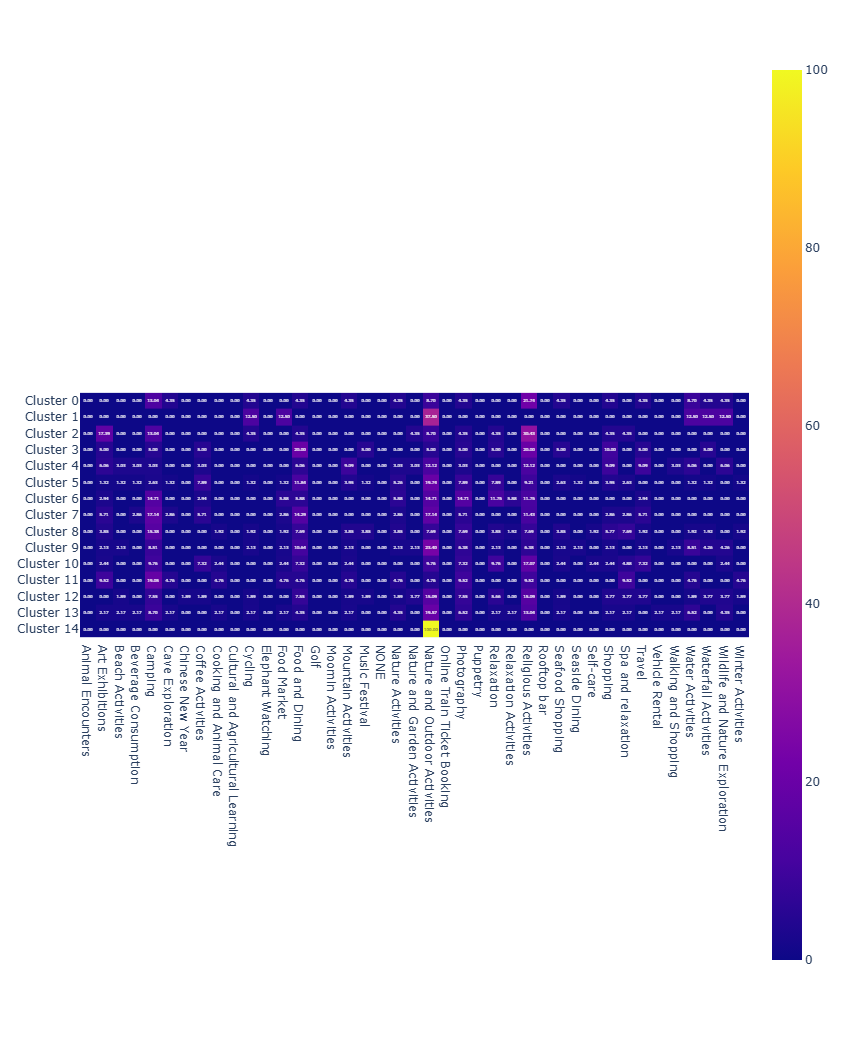

In [1028]:
import plotly.express as px

y = [f'Cluster {label}' for label in np.sort(count_df['label'].unique())]
# x =  list(sorted(major_activity_df['rename_activity_comb'].dropna().unique()))
x =  list(sorted(count_df['activity'].unique()))





# add counter value for each activity in each cluster
# z = [[.1, .3, .5],
#      [1.0, .8, .6],
#      [.6, .4, .2]]

# z_text = [['Win', 'Lose', 'Win'],
#           ['Lose', 'Lose', 'Win'],
#           ['Win', 'Win', 'Lose']]

fig = px.imshow(z, x=x, y=y, text_auto = ".2f", width=60 * len(x), height=70 * len(y))
# fig.update_traces(text=z_text, texttemplate="%{text}")
# fig.update_xaxes(side="top-bottom")

fig.write_image('./dataset/'+str(year)+"/activity_clustering/activity_distribution_by_cluster.png")

fig.show()

In [1029]:
# import plotly.graph_objects as go

# fig1 = go.Figure()

# fig1.add_trace(go.Heatmap(
#                    z=z,
#                    x=x,
#                    y=y,
#     xgap=1,
#             ygap=1,
#                    # text = z,
#     texttemplate="%{z:.2f}",
#                    hoverongaps = False))

# fig1.update_layout(
#     autosize=False,
#     width=50 * len(x), height=75 * len(y),
#     font_color = 'white',
#     # margin=dict(
#     #     l=50,
#     #     r=50,
#     #     b=100,
#     #     t=100,
#     #     pad=4
#     # ),
#     paper_bgcolor="black",
# )
# fig1.write_image('./dataset/'+str(year)+"/activity_clustering/activity_distribution_by_cluster.png")

# fig1.show()


# Process Mining

In [971]:
# best_clusters = pd.read_csv('dataset/'+year+'/place_clustering/pattern/best_clusters.csv')['cluster number'].tolist()
import pandas as pd

from ast import literal_eval
from datetime import datetime, timedelta

import pm4py
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.filtering.log.variants import variants_filter
from pm4py.algo.discovery.heuristics import algorithm as heuristic_miner

In [972]:
year = 2023
df = pd.read_csv(str(year)+'.csv') # โหลดข้อมูลไฟล์ Excel ของเรา
df = df[(df['activity_comb'] != '[()]') & (df['activity_comb'] != '[]')].reset_index(drop=True)
len(df['labels'].unique())

15

In [973]:
def generate_groups(lists):
    for group in product(*lists):
        yield group

#Define a function to be applied to each partition
def primary_type_comb_process_partition(partition):
    partition = partition.reset_index(drop = True)
    # Extract mentioned activities along the places from text post by LLM
    for index, primaryType_itinerary_text in tqdm(enumerate(partition['rename_activity_comb'])):
        try:
            primaryType_itinerary_lists = ast.literal_eval(primaryType_itinerary_text)
            partition.loc[index, 'rename_activity_comb'] = primaryType_itinerary_lists
            partition.loc[index, 'activity_comb'] = ast.literal_eval(partition.loc[index, 'activity_comb'])
        except Exception as e:
            print(e)
    return partition

df = df.astype('object')
# Read the large DataFrame using Dask
_df = dd.from_pandas(df, npartitions=10)

# Apply the function to each partition in parallel
result_df = _df.map_partitions(primary_type_comb_process_partition).compute()
df = result_df.copy()
df = df.reset_index(drop=True)
df

0it [00:00, ?it/s]

malformed node or string on line 1: <ast.Name object at 0x00000255121E3970>
malformed node or string on line 1: <ast.Name object at 0x00000255121E21D0>


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

urls       keyword  \
0    https://www.facebook.com/groups/paikondieow/pe...           ฤดู   
1    https://www.facebook.com/groups/paikondieow/pe...  unidentified   
2    https://www.facebook.com/groups/paikondieow/pe...  unidentified   
3    https://www.facebook.com/groups/paikondieow/pe...         สิงหา   
4    https://www.facebook.com/groups/paikondieow/pe...         สิงหา   
..                                                 ...           ...   
273  https://www.facebook.com/share/p/ahKPxsMNEgzrg...          trip   
274  https://www.facebook.com/groups/paikondieow/pe...            กพ   
275  https://www.facebook.com/groups/paikondieow/pe...            กพ   
276  https://www.facebook.com/groups/paikondieow/pe...         สิงหา   
277  https://www.facebook.com/groups/paikondieow/pe...            ฝน   

                                                  text  \
0    ท่ามกลางท้องฟ้าอันสดใสและผืนทะเลสีครามของต้นฤด...   
1    Gamping คูล ๆ นอนรถบ้านริมทะเลที่เดียวในสัตหีบ...   
2    Gamping คูล ๆ นอนรถบ้านริมทะเลที่เดียวในสัตหีบ...   
3    12 พิกัด มาเก๊า-จูไห่ บินเที่ยวสบายๆ ไม่ต้องทำ...   
4    12 พิกัด มาเก๊า-จูไห่ บินเที่ยวสบายๆ ไม่ต้องทำ...   
..                                                 ...   
273  งามแต้..เมืองแป้หน้าฝนจ้าววว ยิ่งรู้จักยิ่งหลง...   
274  เที่ยวปีใหม่ที่เชียงรายค่ะหลงรักไม่ไหว อยากย้า...   
275  เที่ยวปีใหม่ที่เชียงรายค่ะหลงรักไม่ไหว อยากย้า...   
276  โรงแรมสุดชิล มาพร้อมรูฟท็อปวิวหาดพัทยาสุดปัง "...   
277  ทุ่งนา ภูเขา ลำธาร #บ่อเกลือ #น่าน ถ้าชอบบรรยา...   

                                                places  \
0    ["เกาะมัน", "เกาะมันใน", "เกาะมันกลาง", "เกาะม...   
1    ["หาด EOD สัตหีบ", "หาดน้ำใส", "หาดดงตาล", "ตล...   
2    ["หาด EOD สัตหีบ", "หาดน้ำใส", "หาดดงตาล", "ตล...   
3    ["มาเก๊า", "จูไห่", "PONTO SQUARE", "อนุสรณ์สถ...   
4    ["มาเก๊า", "จูไห่", "PONTO SQUARE", "อนุสรณ์สถ...   
..                                                 ...   
273  ["จังหวัดแพร่", "วัดพระธาตุอินทร์แขวน", "จังหว...   
274  ["เชียงราย", "โรงแรมวังคำ", "สวนดอกไม้", "หอนา...   
275  ["เชียงราย", "โรงแรมวังคำ", "สวนดอกไม้", "หอนา...   
276  ["พัทยา", "ชายหาด", "พัทยาเหนือ", "บางละมุง", ...   
277  ["บ่อเกลือ", "น่าน", "บ่อเกลือโบราณ", "บ้านผาค...   

                                           place_infos  \
0    [{'types': ['natural_feature', 'establishment'...   
1    [{'types': ['natural_feature', 'establishment'...   
2    [{'types': ['natural_feature', 'establishment'...   
3    [{'types': ['clothing_store', 'store', 'point_...   
4    [{'types': ['clothing_store', 'store', 'point_...   
..                                                 ...   
273  [{'types': ['tourist_attraction', 'place_of_wo...   
274  [{'types': ['hotel', 'lodging', 'point_of_inte...   
275  [{'types': ['hotel', 'lodging', 'point_of_inte...   
276  [{'types': ['tourist_attraction', 'point_of_in...   
277  [{'types': ['tourist_attraction', 'point_of_in...   

                                       filtered_places  \
0    ['เกาะมัน', 'เกาะมันใน', 'เกาะมันกลาง', 'เกาะม...   
1    ['หาด EOD สัตหีบ', 'หาดน้ำใส', 'หาดดงตาล', 'ตล...   
2    ['หาด EOD สัตหีบ', 'หาดน้ำใส', 'หาดดงตาล', 'ตล...   
3    ['PONTO SQUARE', 'หวี่นี่', 'ตลาดใต้ดินก๊งเป่ย...   
4    ['PONTO SQUARE', 'หวี่นี่', 'ตลาดใต้ดินก๊งเป่ย...   
..                                                 ...   
273  ['วัดพระธาตุอินทร์แขวน', 'พระธาตุอินทร์แขวน', ...   
274  ['โรงแรมวังคำ', 'หอนาฬิกา', 'ตลาดไนท์บราซ่า', ...   
275  ['โรงแรมวังคำ', 'หอนาฬิกา', 'ตลาดไนท์บราซ่า', ...   
276                      ['ชายหาด', 'M Pattaya Hotel']   
277              ['บ่อเกลือโบราณ', 'บ้านผาคับ', 'Nan']   

                                filtered_rename_places  \
0    ['Ko Man Nork', 'Ko Man Nai', 'Ko Man Klang', ...   
1    ['Nang Rong Beach', 'Nam Sai Beach', 'Dongtan ...   
2    ['Nang Rong Beach', 'Nam Sai Beach', 'Dongtan ...   
3    ['PRONTO Siam square soi 2', 'ไอ-มี่ ชาบู', 'S...   
4    ['PRONTO Siam square soi 2', 'ไอ-มี่ ชาบู', 'S...   
..                                               

In [851]:
major_activity_df = df.explode('rename_activity_comb').reset_index(drop=True)[['rename_activity_comb', 'labels']]
major_activity_df = major_activity_df[major_activity_df['rename_activity_comb']!= 'ERROR']
major_activity_df

rename_activity_comb labels
0                                          [Relaxation]      6
1                               [Relaxation Activities]      6
2                                   [Nature Activities]      6
3     [Spa and relaxation, Nature and Outdoor Activi...      5
4     [Spa and relaxation, Nature and Outdoor Activi...      5
...                                                 ...    ...
1043   [Nature and Outdoor Activities, Food and Dining]      5
1044                  [Seaside Dining, Food and Dining]      5
1045                 [Seaside Dining, Seafood Shopping]      5
1046                  [Seaside Dining, Food and Dining]      5
1047                                          [Camping]      0

[1048 rows x 2 columns]

In [852]:
# Mocking the date times for the event log column
start_date = datetime(1678, 1, 1)  # Mock start date

def generate_datetime(x):
    date_offset = timedelta(days=x['CaseID'] - 1)  # Days offset based on original index
    hour_offset = timedelta(hours=x['EventID'] - 1)  # Hours offset based on caseID
    # return (start_date + date_offset + hour_offset).strftime('%d-%m-%Y:%H.%M')
    return (start_date + date_offset + hour_offset).strftime('%Y-%m-%d  %H:%M:%S')

In [853]:
# prepare data to use in pm4py from list to xes
def create_eventlog_df(data):
  sample_df = pd.DataFrame({'Activity':data})

  sample_df  = pd.DataFrame(sample_df['Activity'].explode()).reset_index().rename(columns={"index":"CaseID"})
  sample_df['CaseID'] += 1

  sample_df = sample_df[sample_df['Activity']!=0]
  sample_df = sample_df.reset_index(drop=True)

  sample_df = sample_df.reset_index().rename(columns={"index":"EventID"})
  sample_df['EventID'] += 1

  sample_df['timestamp'] = sample_df.apply(generate_datetime, axis = 1)
  sample_df['timestamp'] = pd.to_datetime(sample_df['timestamp'], format='%Y-%m-%d  %H:%M:%S')

  # Reorder Columns
  cols = sample_df.columns.tolist()
  cols = cols[1:2] + cols[0:1] + cols[2:]
  sample_df = sample_df[cols]

  sample_df = sample_df.replace({"Activity":num_to_cat})

  return sample_df

In [854]:
def create_eventlog_pm4py(data):
  sample_df = pm4py.format_dataframe(data, case_id='CaseID', activity_key='Activity',
                                   timestamp_key='timestamp')
  log = pm4py.convert_to_event_log(sample_df)

  return log


In [855]:
# prom_output_path = "./activity_clustering/process_mining/"
prom_output_path = "./dataset/"+str(year)+"/activity_process_mining/"
def inductive_miner_visualization(log, cluster_name):
  # the log is filtered on the top 5 variants
  filtered_log = pm4py.filter_variants_top_k(log, 10)

  # filtered_log = variants_filter.filter_log_variants_percentage(log, percentage=0.8)


  # a directly-follows graph (DFG) is discovered from the log
  dfg, start_activities, end_activities = pm4py.discover_dfg(filtered_log)

  # a process tree is discovered using the inductive miner
  process_tree = pm4py.discover_process_tree_inductive(filtered_log)
  # the process tree is converted to an accepting Petri net
  petri_net, initial_marking, final_marking = pm4py.convert_to_petri_net(process_tree)
  process_tree = pm4py.discover_process_tree_inductive(filtered_log)
  # the accepting Petri net is converted to a BPMN diagram
  bpmn_diagram = pm4py.convert_to_bpmn(petri_net, initial_marking, final_marking)

  # the discovered process models are shown on the screen as .svg images
#   pm4py.view_dfg(dfg, start_activities, end_activities, format='png')
  pm4py.vis.save_vis_dfg(dfg, start_activities, end_activities, file_path=f'{prom_output_path}dfg_{cluster_name}.png')
#   print("\n")
#   pm4py.view_process_tree(process_tree, format='png')
  pm4py.vis.save_vis_process_tree(process_tree, file_path=f'{prom_output_path}processtree_{cluster_name}.png')
#   print("\n")
#   pm4py.view_petri_net(petri_net, initial_marking, final_marking, format='png')
  pm4py.vis.save_vis_petri_net(petri_net, initial_marking, final_marking,file_path=f'{prom_output_path}petrinet_{cluster_name}.png')
#   print("\n")
#   pm4py.view_bpmn(bpmn_diagram, format='png')
  pm4py.vis.save_vis_bpmn(bpmn_diagram, file_path=f'{prom_output_path}bpmn_{cluster_name}.png')

  # we compare the original log versus the discovered model
  fitness = pm4py.fitness_token_based_replay(log, petri_net, initial_marking, final_marking)
  precision = pm4py.precision_token_based_replay(log, petri_net, initial_marking, final_marking)

  print(fitness) # 0.984
  print(precision) # 0.758

  # we check if the discovered model is a sound workflow net
  is_sound_wfnet = pm4py.check_soundness(petri_net, initial_marking, final_marking)[0]
  print(is_sound_wfnet) # True

In [856]:
temp_cluster_dict = {}
for i in np.unique(major_activity_df['labels'].tolist()):
  temp_ = major_activity_df[major_activity_df['labels'] == i]['rename_activity_comb'].tolist()
  temp_cluster_dict[i] = temp_
temp_cluster_dict[0]

[['Shopping', 'Religious Activities', 'Religious Activities'],
 ['Food and Dining'],
 ['Photography'],
 ['Food and Dining'],
 ['Photography'],
 ['Religious Activities'],
 ['Mountain Activities'],
 ['Nature and Outdoor Activities', 'Nature and Outdoor Activities', 'Camping'],
 ['Nature and Outdoor Activities',
  'Nature and Outdoor Activities',
  'Wildlife and Nature Exploration'],
 ['Nature and Outdoor Activities',
  'Nature and Outdoor Activities',
  'Nature and Outdoor Activities'],
 ['Nature and Outdoor Activities', 'Religious Activities', 'Camping'],
 ['Nature and Outdoor Activities',
  'Religious Activities',
  'Wildlife and Nature Exploration'],
 ['Nature and Outdoor Activities',
  'Religious Activities',
  'Nature and Outdoor Activities'],
 ['Religious Activities', 'Nature and Outdoor Activities', 'Camping'],
 ['Religious Activities',
  'Nature and Outdoor Activities',
  'Wildlife and Nature Exploration'],
 ['Religious Activities',
  'Nature and Outdoor Activities',
  'Nature an

In [857]:
np.unique(major_activity_df['labels'].tolist())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [858]:
def liststr_to_list(liststr):
  tolist = ast.literal_eval(liststr)
  return tolist

def create_categorical_numerical_pair(data):
  categorical_to_numerical = {"NONE": 0}
  numerical_to_categorical = {0: "NONE"}

  for index, element in enumerate(sorted(list(set(chain.from_iterable(data))))):
    categorical_to_numerical[element] = index+1
    numerical_to_categorical[index+1] = element

  return categorical_to_numerical, numerical_to_categorical

def preprocess(data, categorical_to_numerical, numerical_to_categorical, padding = True, encoding = True, padding_tag = 0):

  max_length = len(max(data, key=len))
  # categorical_to_numerical, numerical_to_categorical = create_categorical_numerical_pair(data)

  preprocessed_list = []

  for subsequence in data:
    sequence = subsequence
    if encoding:
        sequence = [categorical_to_numerical[point] for point in subsequence]

    if padding:
      if len(sequence) < max_length:
        for i in range(0, max_length - len(subsequence)):
          sequence.append(padding_tag)
    preprocessed_list.append(sequence)

  return preprocessed_list

In [859]:
from itertools import chain
itinerary_by_type = major_activity_df['rename_activity_comb'].tolist()

cat_to_num, num_to_cat= create_categorical_numerical_pair(itinerary_by_type)

temp_cluster_dict = {}
for i in np.unique(df['labels'].tolist()):
  temp_ = major_activity_df[major_activity_df['labels'] == i]['rename_activity_comb'].tolist()
  temp_cluster_dict[i] = temp_
temp_cluster_dict[0]

[['Shopping', 'Religious Activities', 'Religious Activities'],
 ['Food and Dining'],
 ['Photography'],
 ['Food and Dining'],
 ['Photography'],
 ['Religious Activities'],
 ['Mountain Activities'],
 ['Nature and Outdoor Activities', 'Nature and Outdoor Activities', 'Camping'],
 ['Nature and Outdoor Activities',
  'Nature and Outdoor Activities',
  'Wildlife and Nature Exploration'],
 ['Nature and Outdoor Activities',
  'Nature and Outdoor Activities',
  'Nature and Outdoor Activities'],
 ['Nature and Outdoor Activities', 'Religious Activities', 'Camping'],
 ['Nature and Outdoor Activities',
  'Religious Activities',
  'Wildlife and Nature Exploration'],
 ['Nature and Outdoor Activities',
  'Religious Activities',
  'Nature and Outdoor Activities'],
 ['Religious Activities', 'Nature and Outdoor Activities', 'Camping'],
 ['Religious Activities',
  'Nature and Outdoor Activities',
  'Wildlife and Nature Exploration'],
 ['Religious Activities',
  'Nature and Outdoor Activities',
  'Nature an

In [860]:
cluster_df = create_eventlog_df(temp_cluster_dict[0])
cluster_df

CaseID  EventID              Activity           timestamp
0        1        1              Shopping 1678-01-01 00:00:00
1        1        2  Religious Activities 1678-01-01 01:00:00
2        1        3  Religious Activities 1678-01-01 02:00:00
3        2        4       Food and Dining 1678-01-02 03:00:00
4        3        5           Photography 1678-01-03 04:00:00
..     ...      ...                   ...                 ...
62      31       63               Camping 1678-02-02 14:00:00
63      32       64  Religious Activities 1678-02-03 15:00:00
64      32       65  Religious Activities 1678-02-03 16:00:00
65      32       66  Religious Activities 1678-02-03 17:00:00
66      33       67               Camping 1678-02-04 18:00:00

[67 rows x 4 columns]

In [ ]:
# cluster_index = 0
cluster_dict = temp_cluster_dict
for i in range(0, len(cluster_dict)):
  print(f"Cluster {i+1}:")
  cluster_df = create_eventlog_df(cluster_dict[i])
  cluster_log = create_eventlog_pm4py(cluster_df)
  inductive_miner_visualization(cluster_log, f"Cluster{i+1}")

  # alpha_miner_visualization(cluster_log)
  print("###########################################")

# Not use

In [1060]:
data = pd.read_csv('2023.csv')
data.loc[data['subType'].str.contains("hospital")]['text'].to_list()


['ขออนุญาตแอดมินเพจนะครับมาอัพเดทไร่กะหล่ำเขา360ดอยบ่าโจ๊ะโข่ ดอยเพาะแพะโจ๊ะ ช่วงนี้ครับขุนแปะกระท่อมตะวัน ไรวินท์',
 'ชุมชนบ้านมณีพฤกษ์ อำเภอทุ่งช้าง จังหวัดน่านชุมชนที่โอบล้อมไปด้วยธรรมชาติ .นักท่องเที่ยวที่เดินทางมาเที่ยวที่ชุมชนบ้านมณีพฤกษ์ จะได้สัมผัสกับธรรมชาติที่อุดมสมบูรณ์ของผืนป่า ได้สนุกตื่นเต้นไปกับการเดินป่าขึ้นชมวิว และถ่ายภาพสวยๆ บนยอดเขาสูงที่ดอยผาผึ้ง .หลังจากเดินป่ากันมาเหน็ดเหนื่อยแล้ว จุดท่องเที่ยวต่อไปสามารถแวะพักผ่อนชมถ้ำสุดงดงาม ยาวเป็นอันดับที่ 10 ของประเทศไทย หรือจะหาแวะร้านกาแฟชิมกาแฟขึ้นชื่อของชุมชนบ้านมณีพฤกษ์ที่ ร้านกาแฟเดอม้ง ซึ่งเมล็ดกาแฟคั่วบดที่ทางร้านนำมาชงเครื่องดื่มให้ลูกค้าทุกท่านได้ชิม ผ่านการผลิตที่พิถีพิถันทุกขั้นตอน ตั้งแต่ขั้นตอนการปลูกกาแฟ การเก็บเมล็ดกาแฟสุก การตากเมล็ดกาแฟ การคั่วเมล็ดกาแฟดิบ และการชงกาแฟแบบบาริสต้าชั้นนำ รับรองได้ว่าหอมอร่อยแน่นอน และหากนักท่องเที่ยวท่านใดสนใจพักค้างคืนที่ชุมชนบ้านมณีพฤกษ์ ทางชุมชนก็มีที่พัก ฮักดอย บ้านมณีพฤกษ์ หนึ่งในที่พักน่าสนใจติดภูเขา ที่ยามเช้าหากอากาศดีๆ เราอาจจะได้เห็นวิวภูเขาตัดกับสายหมอก สั่งเมนูอา